# PLANT TRAITS 2024 - Exploración de datos

En este primer script lo que se pretende realizar es una exploración de los datos disponibles para que, de acuerdo a lo investigado anteriormente, podamos asegurar que contamos con data precisa y óptima para el comienzo del proyecto. Para poder realizar esto, intentaré responder las preguntas que se plantean como las mejores para el análisis de la data disponible. Las preguntas son las siguientes:

1. Haz el conteo del número de registros que tienes - ¿es lo que esperabas?
2. Busca los valores nulos - ¿Cómo lidiar con ellos?
3. Verifica el tipo de distribución de cada columna - ¿Éstos hacen match con la distribución esperada?
4. Busca outliers - ¿Hay anomalias en la data, todos los valores son válidos?
5. Valida si tu data está balanceada - ¿Hay diferentes grupos que representan todo el conjunto de datos, hay suficientes ejemplos de cada uno de estos grupos
6. ¿Existen sesgos en tu data? -¿Hay subgrupos que tratas de manera más favorable que otros?
7. Para valores NA o NULL, en vez de eliminar aquellos registros que los contengan, mejor es sustituirlos por un valor apropiado: por ejemplo, para variables continuas, se puede utilizar la moda, media o mediana; para variables categóricas, se puede utilizar la moda o una nueva categoría (por ejemplo “NA”) **IDEA PARA EL MANEJO DE LOS NULLS, AL SER VARIABLES DE SD, VERIFICAR SI ESTOS VALORES PUEDEN SER CALCULADOS DIRECTAMENTE A PARTIR DE LOS VALORES DE SUS DEMAS VARIABLES, SE PIENSA QUE VIENEN DE CALCULAR LA SD DE LAS COLUMNAS CORRESPONDIENTES A SUS REGISTROS**
8. Verificar si el modelo es robusto o sensible a outliers

A partir de los resultados obtenidos de responder las preguntas es que daré un juicio final sobre los datos.

In [1]:
#Librerias generales a utilizar

#Libreria donde tenemos las funciones para realizar el análisis exploratorio de este libro
import functions.data_exploratory_functions as dtef

## Pregunta 1 - Conteo de registros

La pregunta en específico que se pretende responder en este punto es la siguiente: **_Haz el conteo del número de registros que tienes - ¿es lo que esperabas?_**

De primera instancia, podemos decir que se tienen dos tipos de datos disponibles: archivos CSV e imágenes en formato JPEG. Las imágenes se encuentran en dos carpetas, uno de entrenamiento y otro de prueba, la carpeta de entrenamiento contiene un total de 55,523 imágenes, mientras que la carpeta de prueba contiene un total de 13,907 imágenes, con esto, contamos con un **total de 69,430 imágenes de plantas en formato JPEG**.

Aquí no se va a realizar el conteo mediante alguna rutina debido a que el número de imágenes es muy grande y la memoria de este libro de Jupyter no alcanza para poder procesar todas las imágenes en una sola rutina de conteo. Para el conteo de registros en los archivos CSV se realizará lo siguiente:

In [2]:
#Obtenemos los enunciados más importantes para el conteo de registros
df_train, df_test = dtef.get_records_count('csv')

El conjunto/tabla de entrenamiento contiene un total de 55489 registros
El conjunto/tabla de prueba contiene un total de 13873 registros
En total, se cuenta con 69362 registros


De lo anterior, podemos obtener las siguientes conclusiones:

1. Para el conjunto de entrenamiento, se tienen 55,523 imágenes y 55,489 registros en su archivo CSV por lo que sugiere que para algunas fotos (34) no se tiene su respectiva información dentro del archivo CSV
2. Para el conjunto de prueba, se tienen 13,907 imágenes y 13,873 registros en su archivo CSV por lo que sugiere que para algunas fotos (34) no se tiene su respectiva información dentro del archivo CSV
3. En total, se tiene un total de 68 registros menos en CSV que en imágenes.

De manera general, podemos decir que **el volúmen de los datos si es lo esperado**, es un volúmen grande que nos ayudará a hacer un mejor entrenamiento del modelo. El número de registros faltantes en verdad es muy poco (0.001%) comparado con el total de registros que si se tienen, por lo que no representa una amenaza para el proyecto. En este punto la data se encuentra perfecto.

## Pregunta 2 - Valores nulos

La pregunta en específico que se pretende responder en este punto es la siguiente: **_Busca los valores nulos - ¿Cómo lidiar con ellos?_**

De primera instancia, para el conjunto de imágenes sabemos que no existen valores nulos ya que son imágenes y no existe algo como "imagen nula", aquí simplemente se revisa si se tiene la imagen o no. Por otro lado, dentro de los archivos CSV si pueden llegar a existir valores nulos, por lo que se realizará la investigación pertinente.

In [3]:
#Obtenemos el df con aquellas columnas con al menos un valor nulo
df_cols = dtef.get_columns_null_values(df_train,df_test)
df_cols

,type,columns,data_type,num_nulls
170,train,X4_sd,float64,16341
171,train,X11_sd,float64,16341
172,train,X18_sd,float64,16341
173,train,X26_sd,float64,16341
174,train,X50_sd,float64,16341
175,train,X3112_sd,float64,16341


Después de realizar los procedimientos pertinenetes, podemos ver que existen 6 columnas (X[*]_sd), dentro del conjunto de datos de entrenamiento, que tienen algunos registros nulos, en total, son 16,341 registros nulos para estas 6 columnas, los cuales representan un 29.45% del total. 

A su vez, las columnas que resultaron con valores nulos son la representación de la desviación estándar de sus respectivas variables de tipo X[*]_mean, las cuale son las variables que deseamos predecir. Esto de principio podemos pensar que no representa una amenaza grande para el entrenamiento del modelo y los resultados que podamos ir obteniendo, ya que no son las variables objetivo y, de acuerdo a investigaciones pasadas, son variables que podemos manejar con algunas técnicas de sustitución.  

Todas las demás columnas de las tablas de entrenamiento y prueba se encuentran con registros perfectos.

## Pregunta 3 - Distribución de las columnas

La pregunta en específico que se pretende responder en este punto es la siguiente: **_Verifica el tipo de distribución de cada columna - ¿Éstos hacen match con la distribución esperada?_**

Cuando se está tratando con diferentes conjuntos de datos lo que uno se espera siempre es que éstos tengan una distribución _ventajosa_ para nuestros propósitos y así hacer que los cálculos pertinentes o manejo de los datos que se requieran hacer se puedan realizar de una manera más rápida, eficiente y pertinenete. Con esto, una de las distribuciones más deseadas a la hora de estar trabajando con conjuntos de datos es la **distribución normal** ya que esta distribución se comporta demasiado bien con muchos sepuestos y teoremas que podemos aplicar en algún momento hacia los datos aunque, por supuesto, no siempre es la distribución que obtenemos para nuestros datos. 

Se analizará el tipo de distribución que tienen las columnas del conjunto tanto de entrenamiento como el de prueba y esperar, en primera instancia, que de alguna manera se comporten de la misma manera entre ambos conjuntos y, por otra parte, con algo de suerte, que éstas distribuciones sean las más parecidas a la normal.  

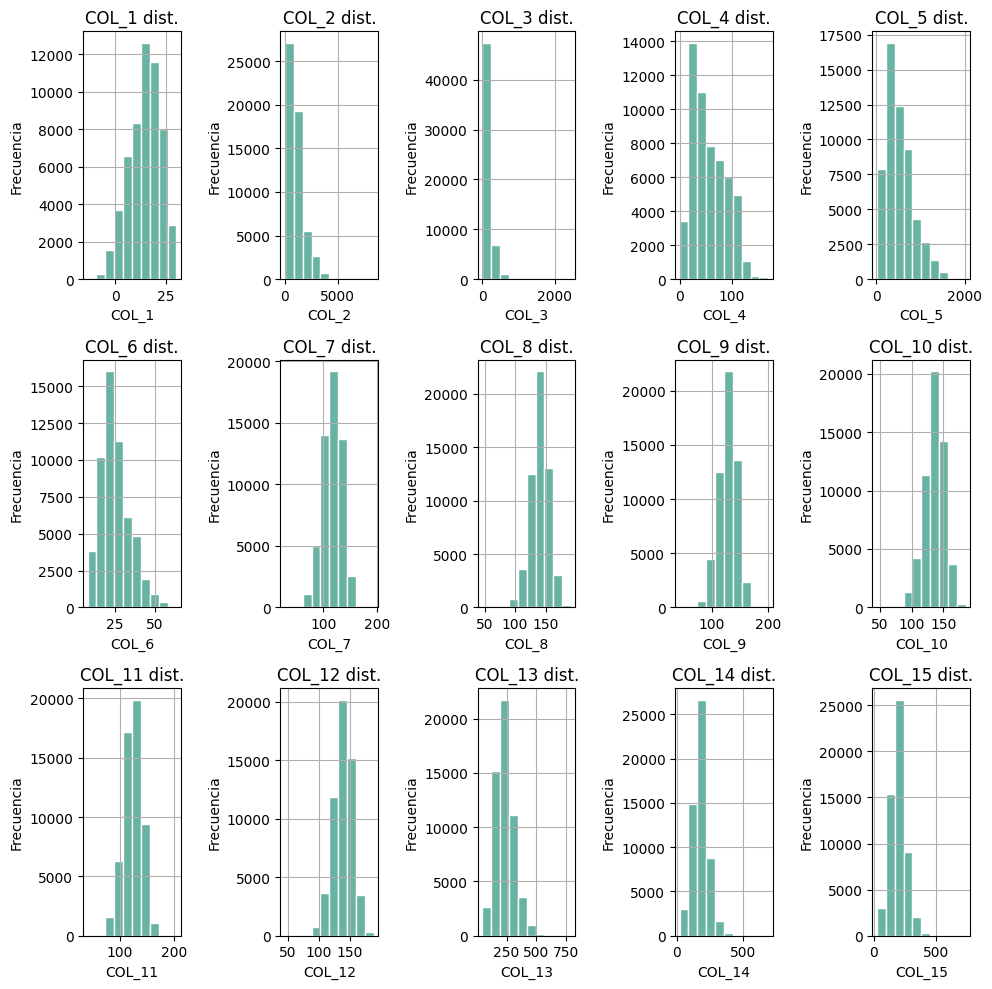

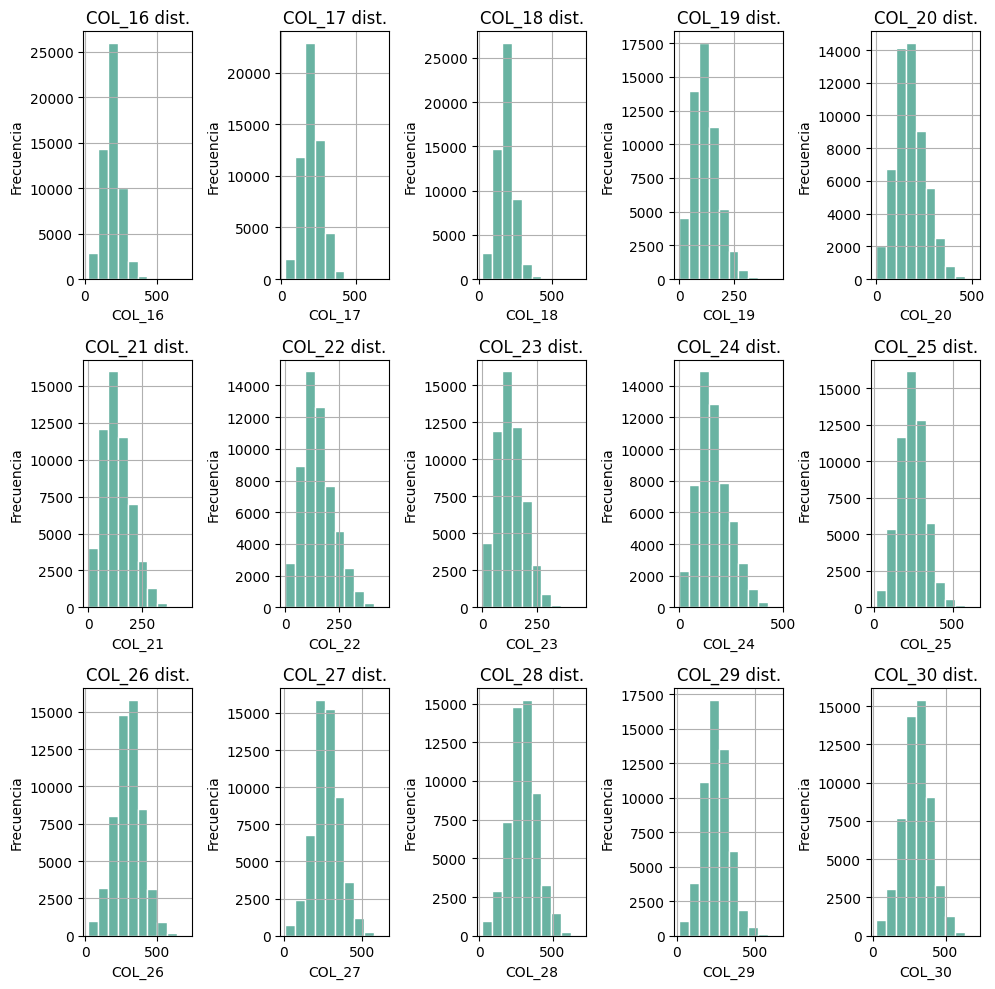

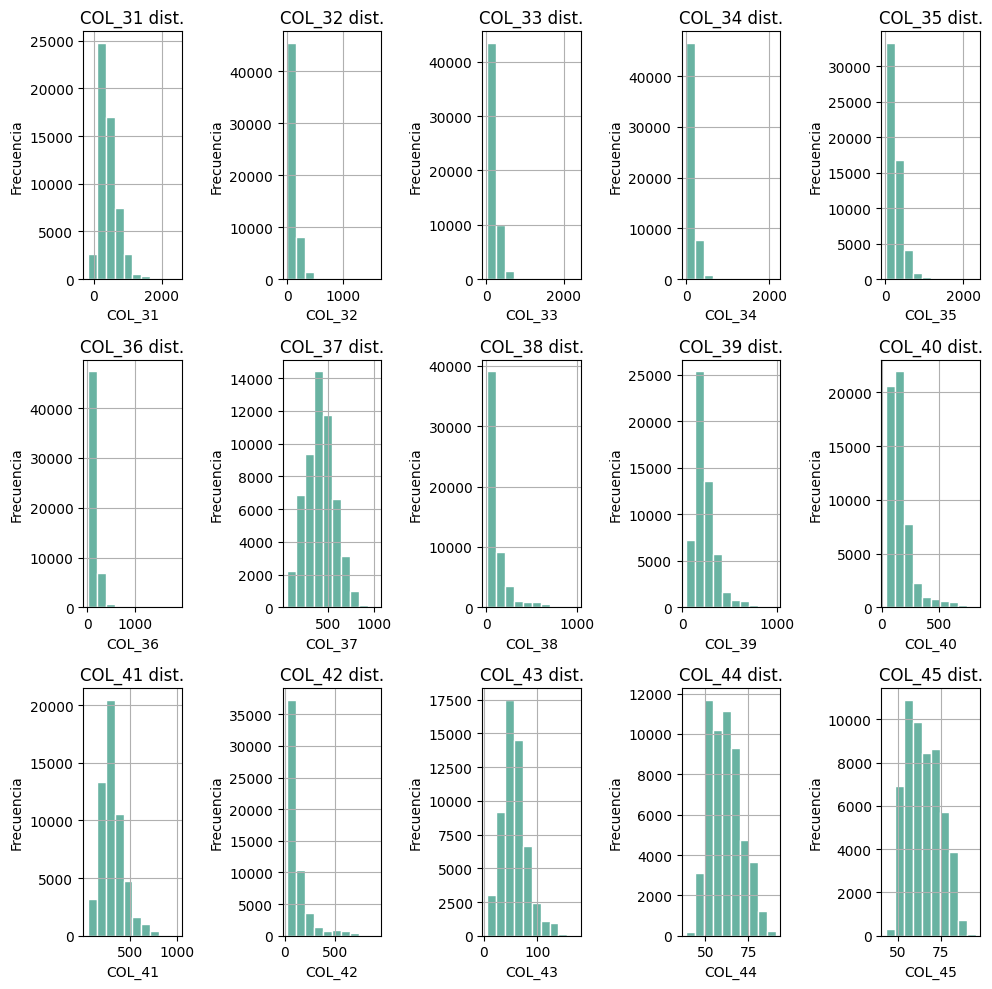

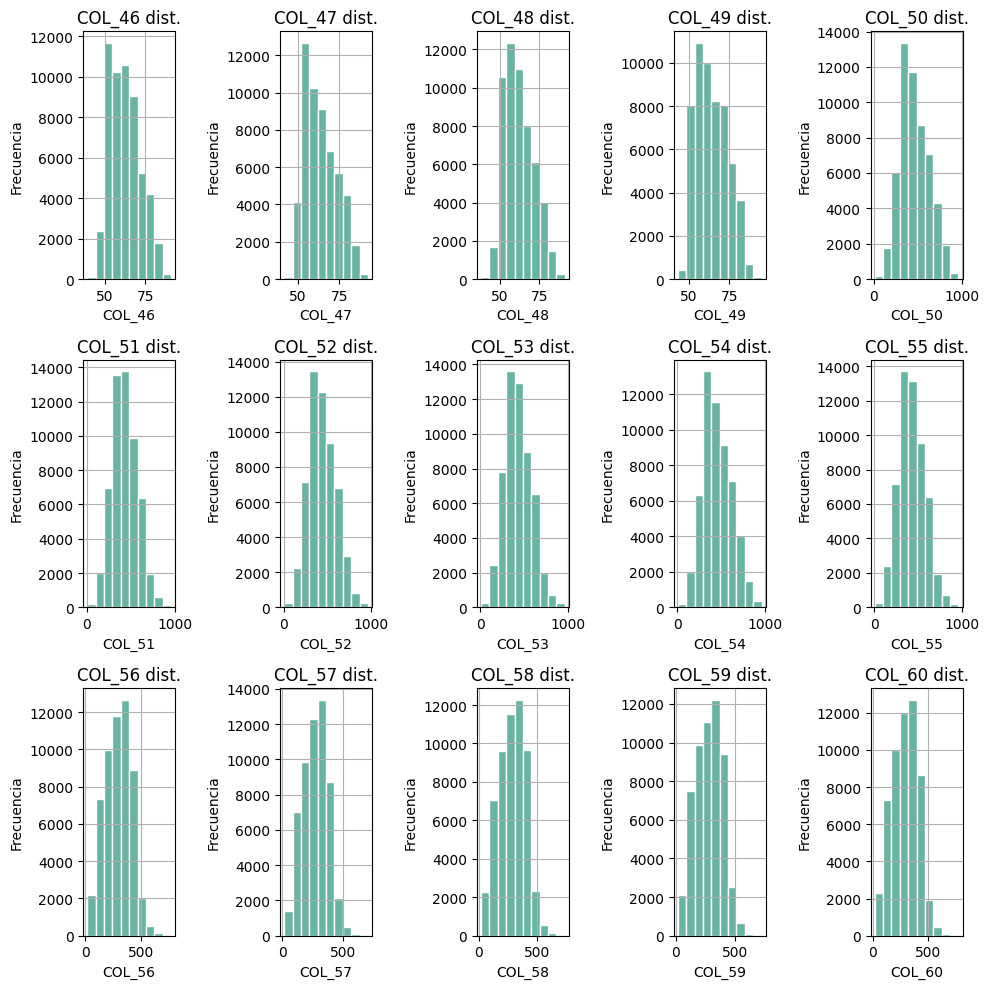

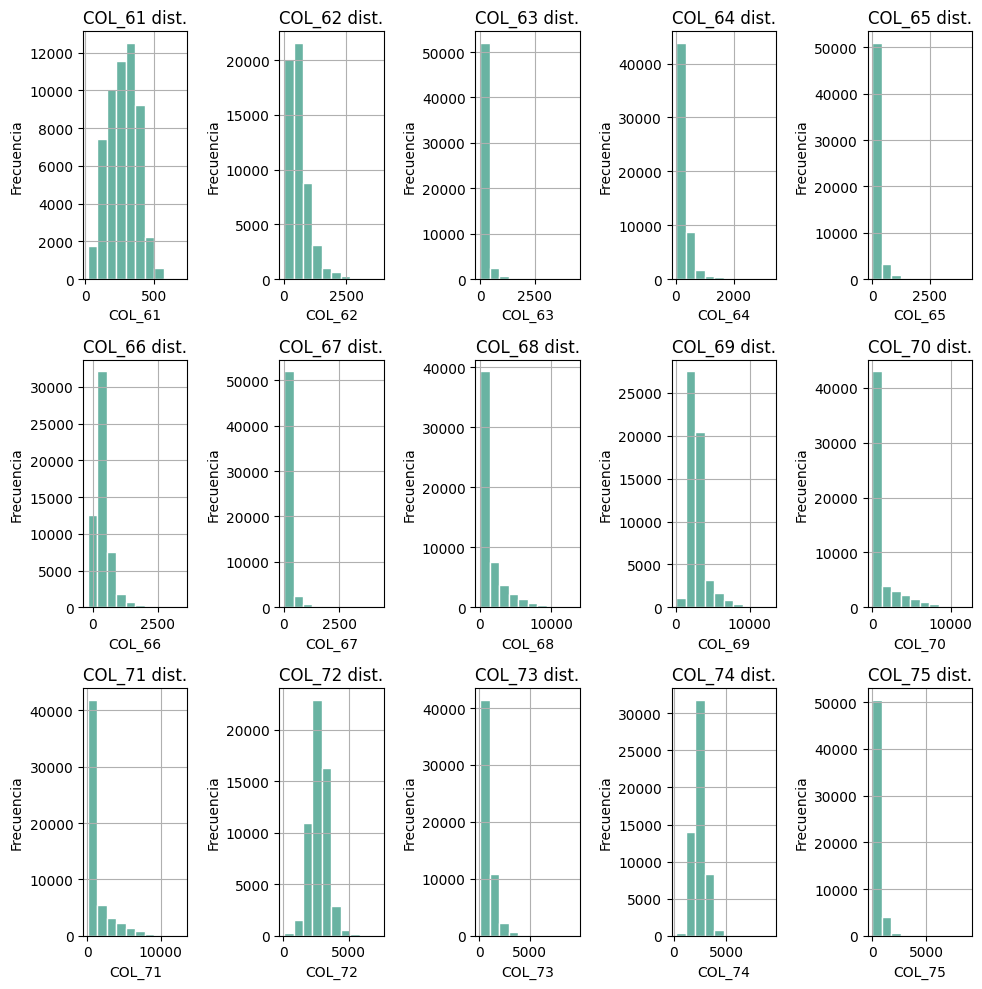

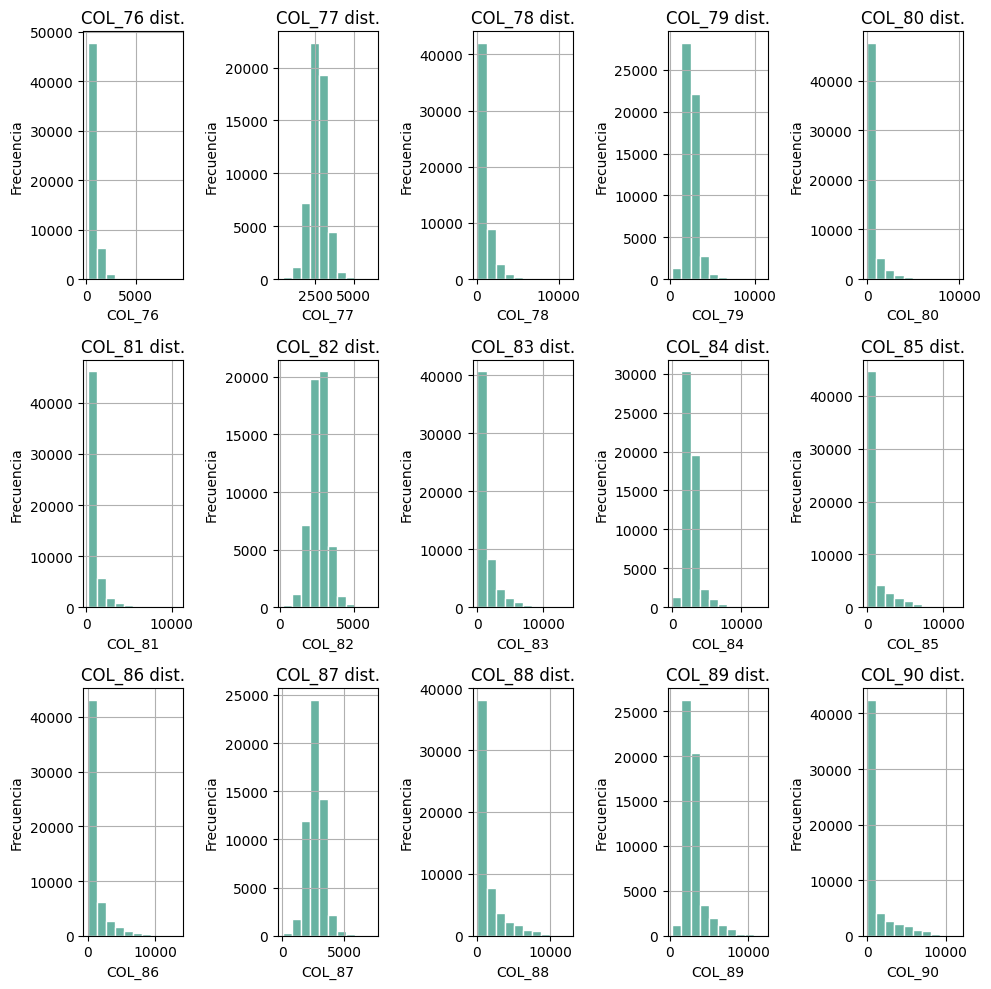

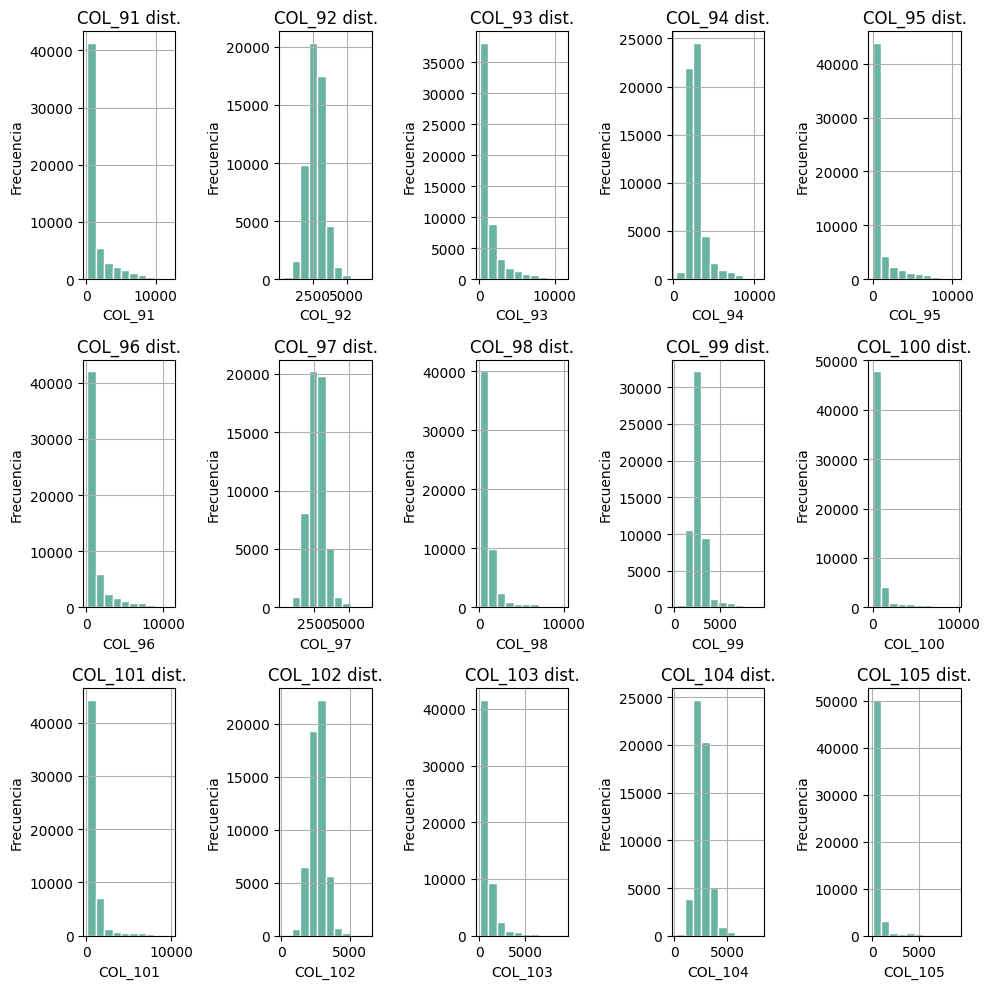

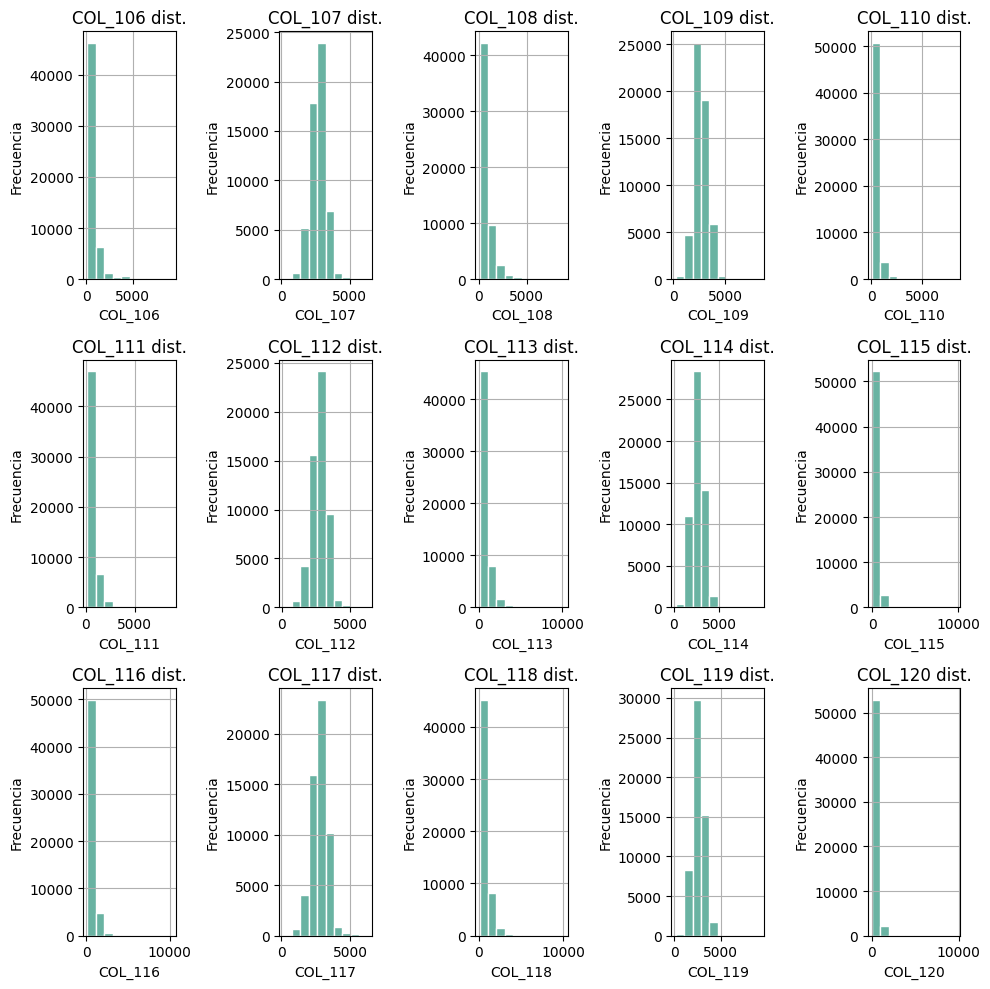

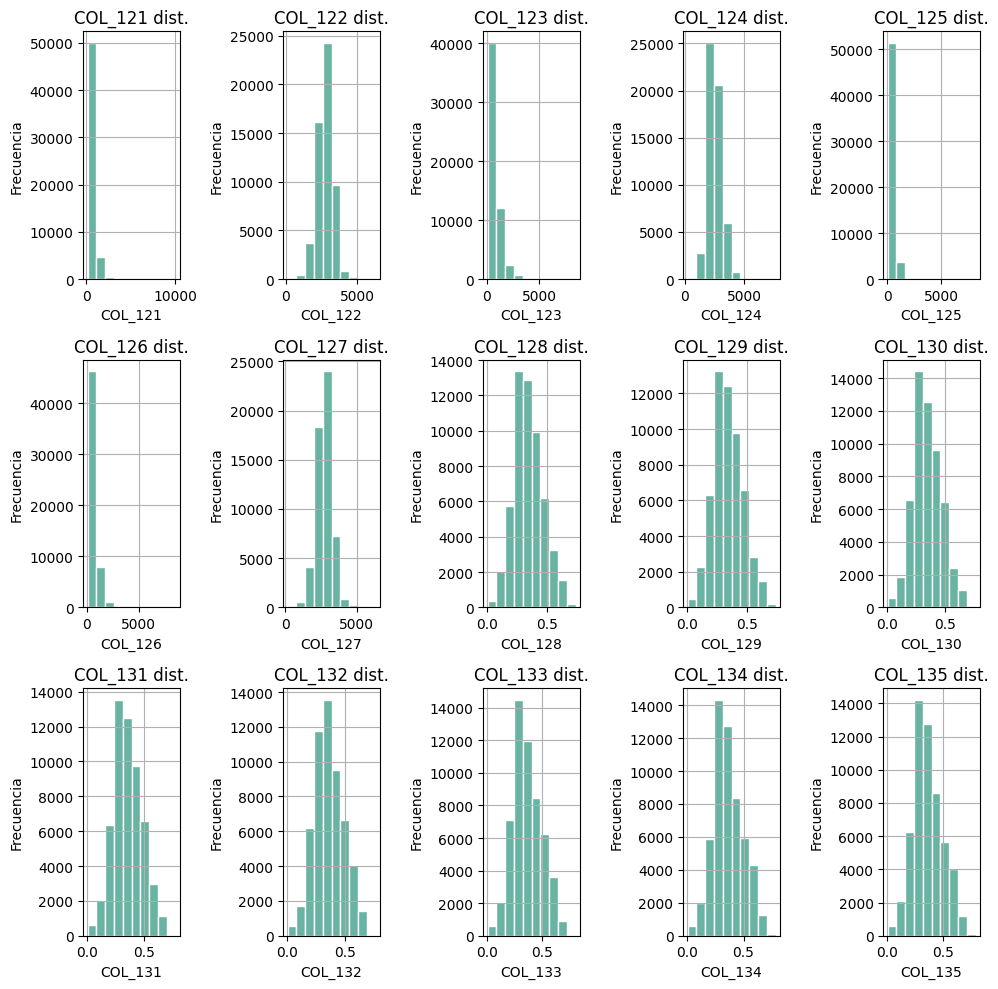

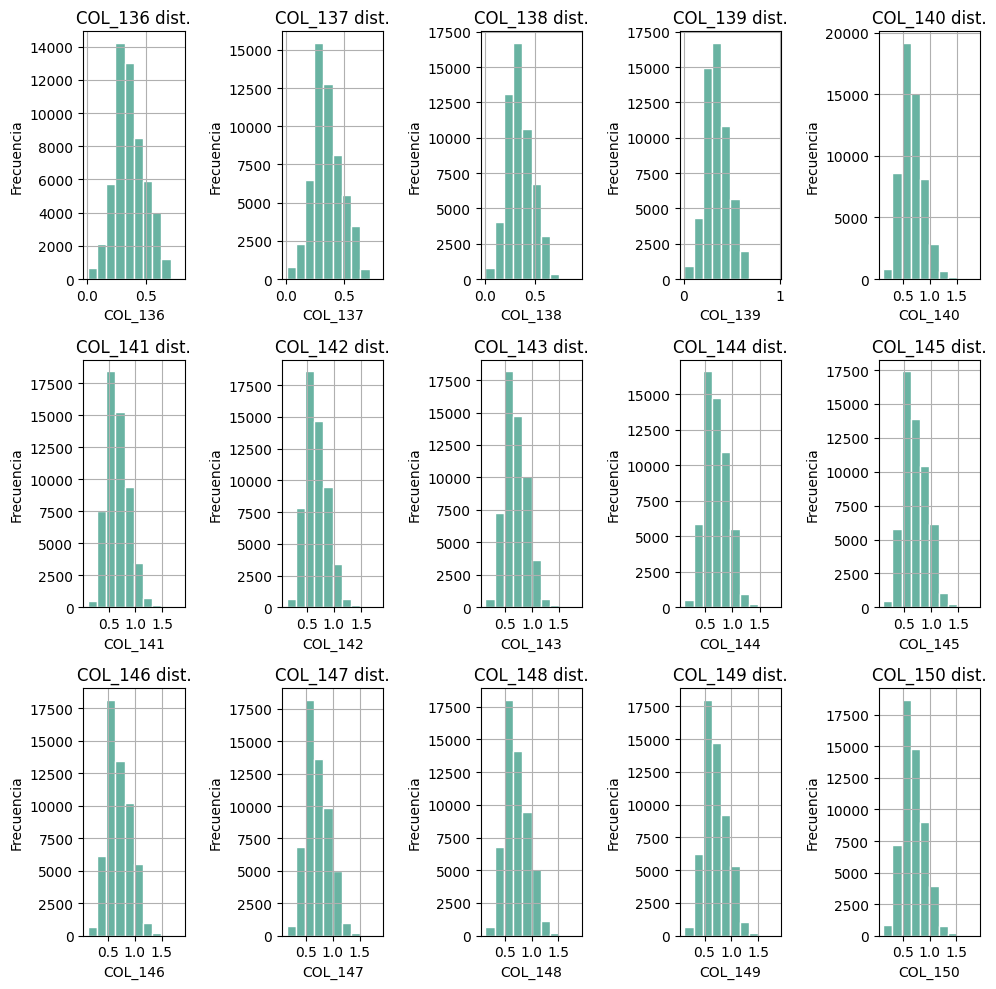

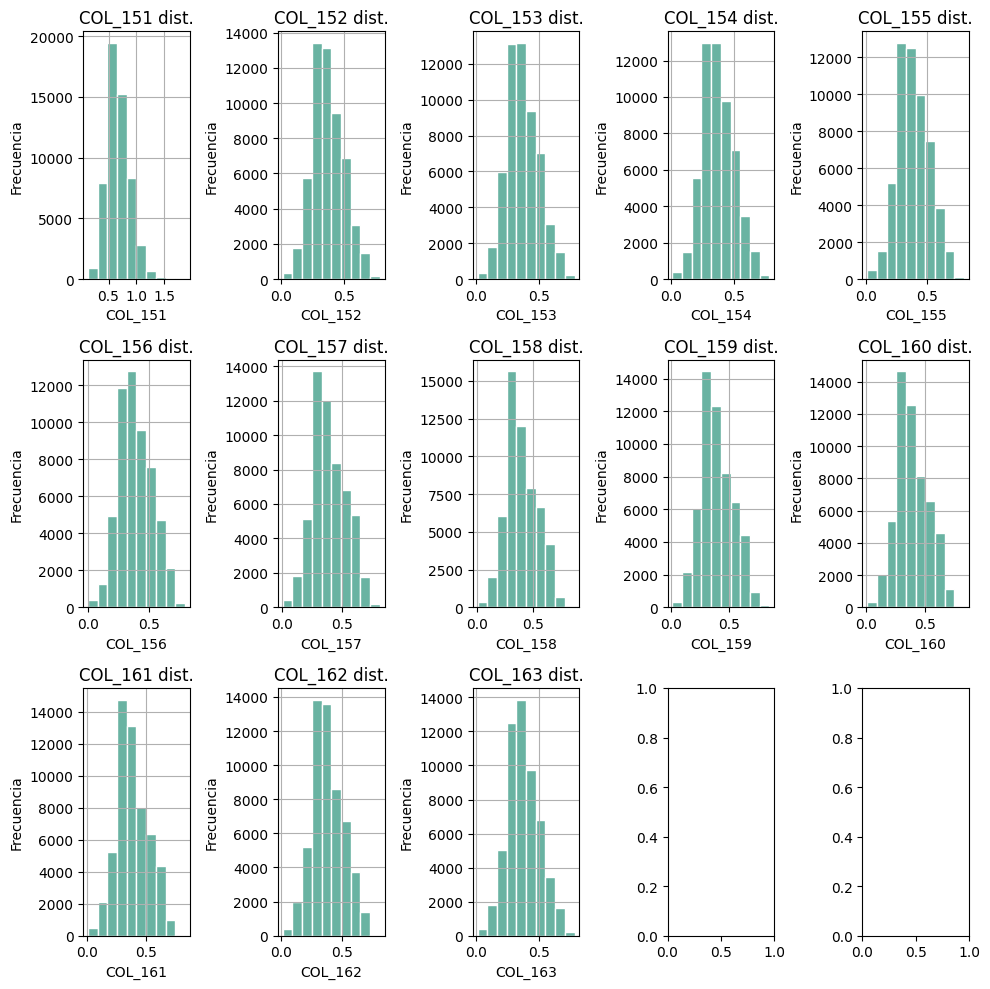

In [4]:
#Creamos la lista de indices con el cual controlaremos que columnas serán las que graficaremos
lista_indices = [(1,16),(16,31),(31,46),(46,61),(61,76),(76,91),(91,106),(106,121),(121,136),(136,151),(151,164)]

#Creamos el loop sobre el cual iremos mostrando las gráficas
for i,x in lista_indices:
    #Aplicamos la función para graficar
    dtef.plot_hist_columns(df_train,i,x,3,5)

En total, hay 63 columnas con coeficiente de sesgo >= 1
En total, hay 0 columnas con coeficiente de sesgo <= -1
En total, hay 100 columnas con coeficiente de sesgo cercano a cero


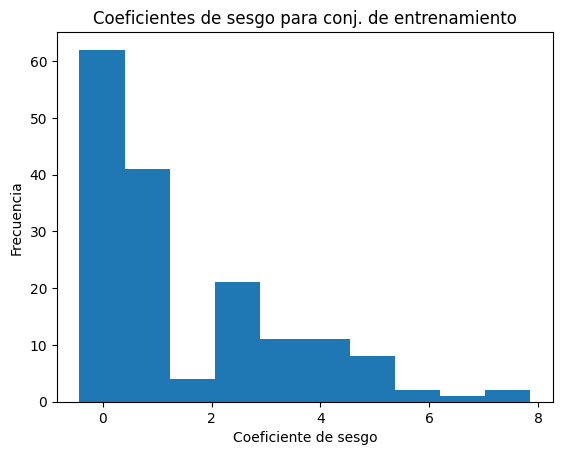

In [5]:
#Mostramos el histograma de los coeficientes de sesgo junto a algunos resultados importantes
dtef.show_skew_coeff(df_train,1,164)

Después de obtener las gráficas de todas las columnas del conjunto de entrenamiento, podemos obtener las siguientes conclusiones:

1. De manera general, podemos decir que el conjunto de datos pareciera tener 2 tipos de distribuciones aparentes: o bien se comportan de una manera muy parecida a la distribución normal (deseable) o se encuentran sesgadas hacia la izquierda.

2. Después de realizar los cálculos pertinentes, obtuvimos que un total de 100 (61.35%) columnas/variables presentan un coeficiente de sesgo < 1 en valor absoluto, lo cual nos indica que éstas columnas presentan una distribución muy cercana a la normal, un resultado muy deseable ya que, mientras más variables tengamos con ese tipo de distribución, más fácil y mejores serán los cálculos que realicemos

3. Un total de 63 (38.65%) columnas presentan un coeficiente de sesgo mayor a uno, lo cual representa, a su vez, un sesgo hacia la izquierda. Este representa un valor de cierta manera alto ya que es más de una cuarta parte del número de columnas, sin embargo, estos valores de sesgo se encuentran acumulados entre 2 y 6 (histograma de arriba), lo cua nos dice a la vez que no tenemos valores muy alto de sesgo y podría pensarse que es un coeficiente "aceptable" para empezar a trabajar con ellos. El valor máximo de sesgo para el conjunto de datos de entramiento es 7.85, lo cual es un númeron aceptable.

4. No contamos con columnas con un coeficiente de sesgo menor a -1, lo cual nos indica que no tenemos columnas con una distribución sesgada a la derecha.

En conclusión, afortunadamente contamos con la mayoría de columnas que presentan un coeficiente de sesgo cercano a cero y, por lo tanto, una distribución muy parecida a la normal, lo cual es un resultado bastante deseable. Podríamos esperar que los resultados y procedimiento del manejo del modelo sean muy eficientes.

## Pregunta 4 - Outliers

La pregunta en específico que se pretende responder en este punto es la siguiente: **_Busca outliers - ¿Hay anomalias en la data, todos los valores son válidos?_**

De primera instancia, cuando se está trabajando con conjuntos de datos, uno de los comportamientos esperados de los datos es que éstos no presenten _outliers_ o registros atípicos, es decir, aquellos que se salgan del rango "común" que tienen los demás datos dentro del conjunto total, esto con el fin de que éstos datos atípicos no influyan de manera negativa en el entrenamiento del modelo y, por lo tanto, en los resultados finales (esto claro si suponemos que el modelo que se utilizará no es robusto con outliers). Si bien puede ser que si existan datos atípicos dentro del conjunto de datos (algo que no podemos controlar), lo más deseable es que éstos sean los menos dentro de todo el conjunto.

Para esta pregunta, se realizará un procedimiento similar al del punto anterior, se analizarán algunas gráficas y presentar algunos datos puntuales acerca del comportamiento de los datos en este rubro para que al final podamos dar una conclusión puntual acerca de los outliers en nuestro conjunto de entrenamiento

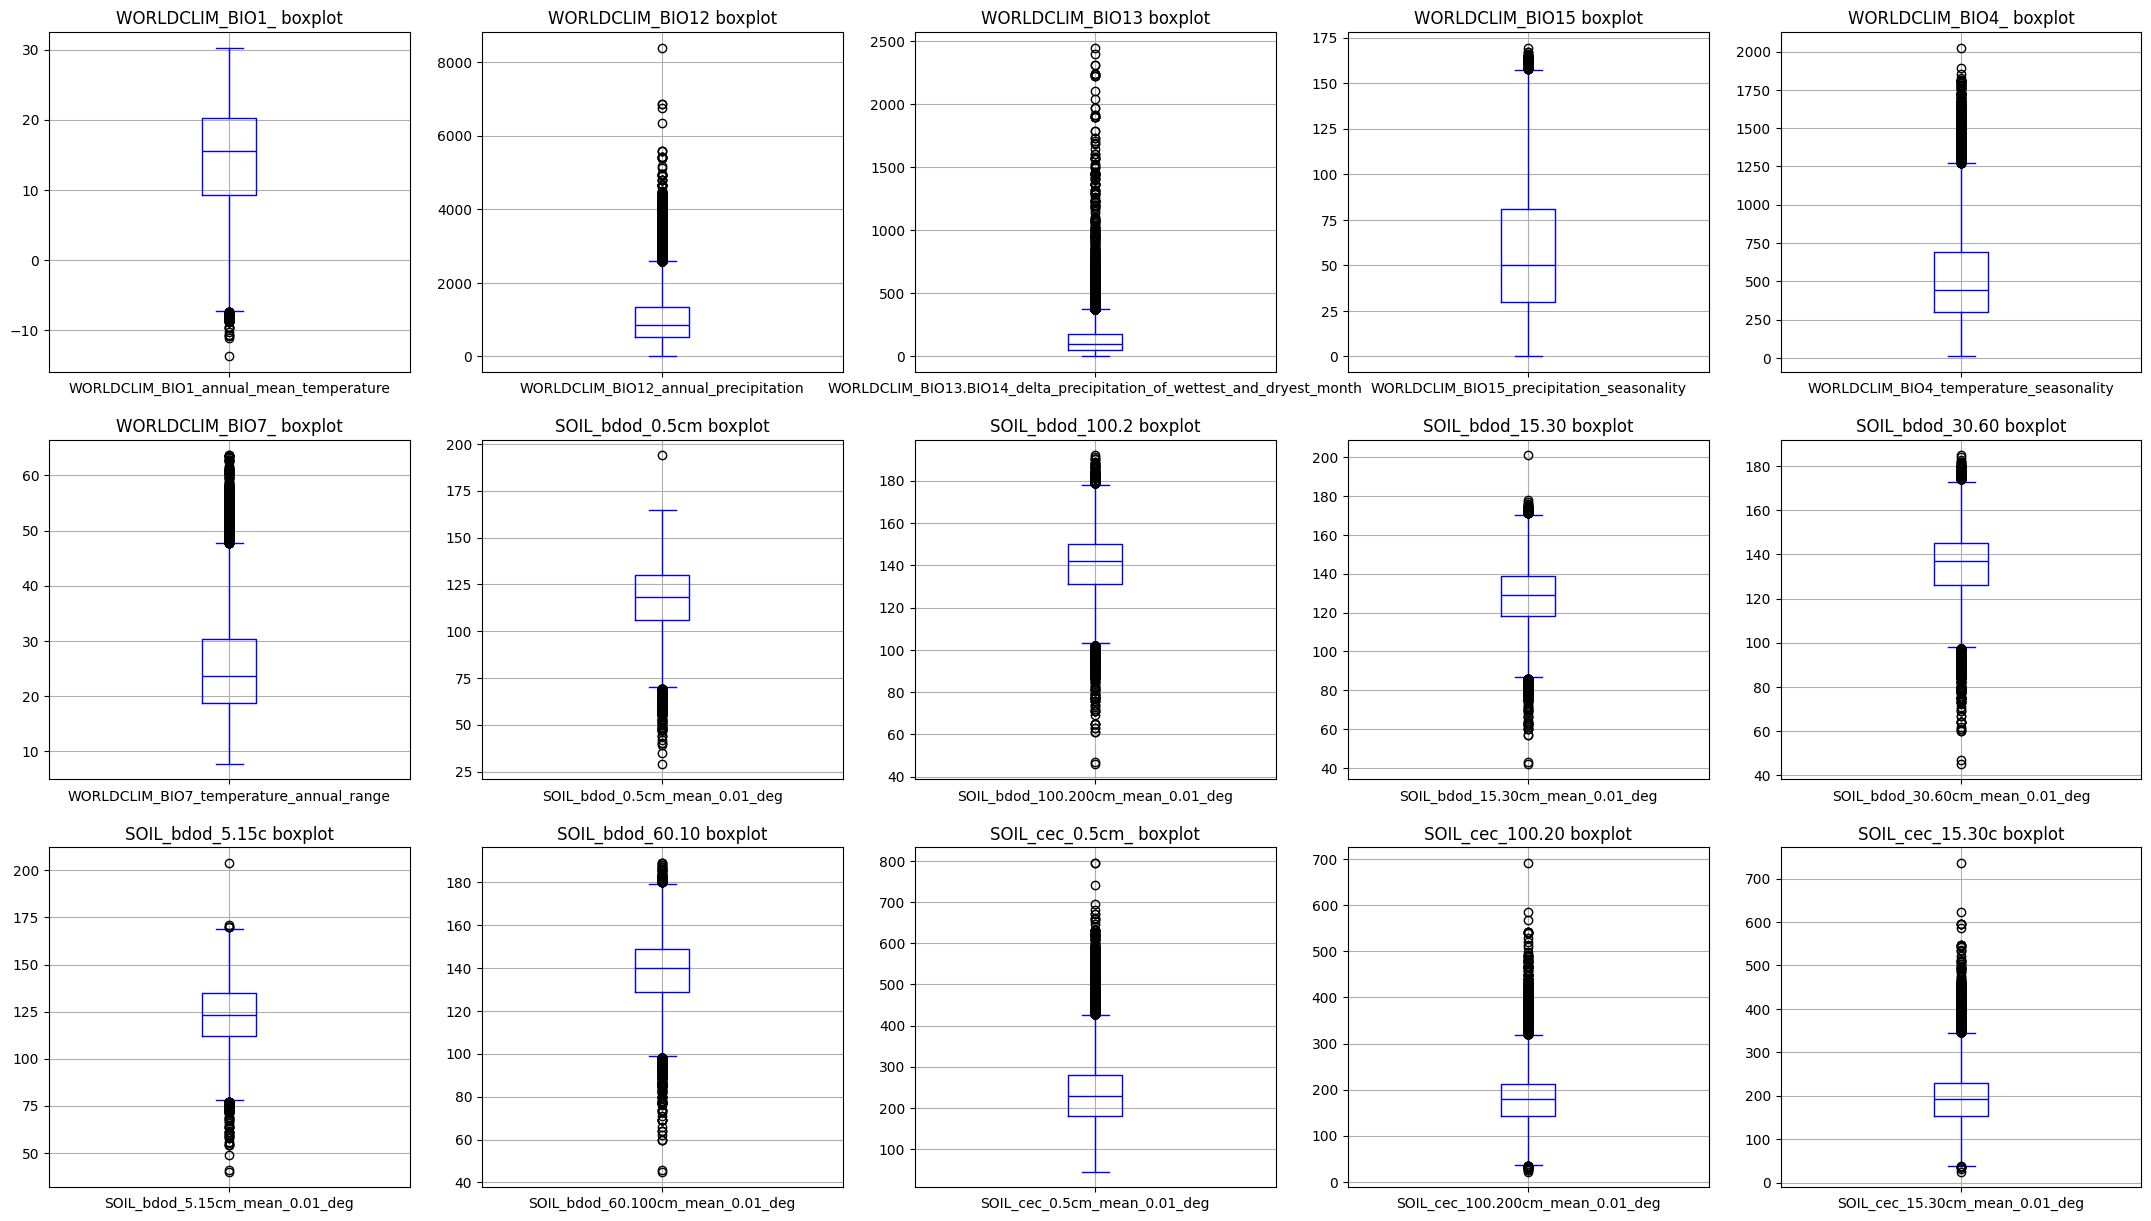

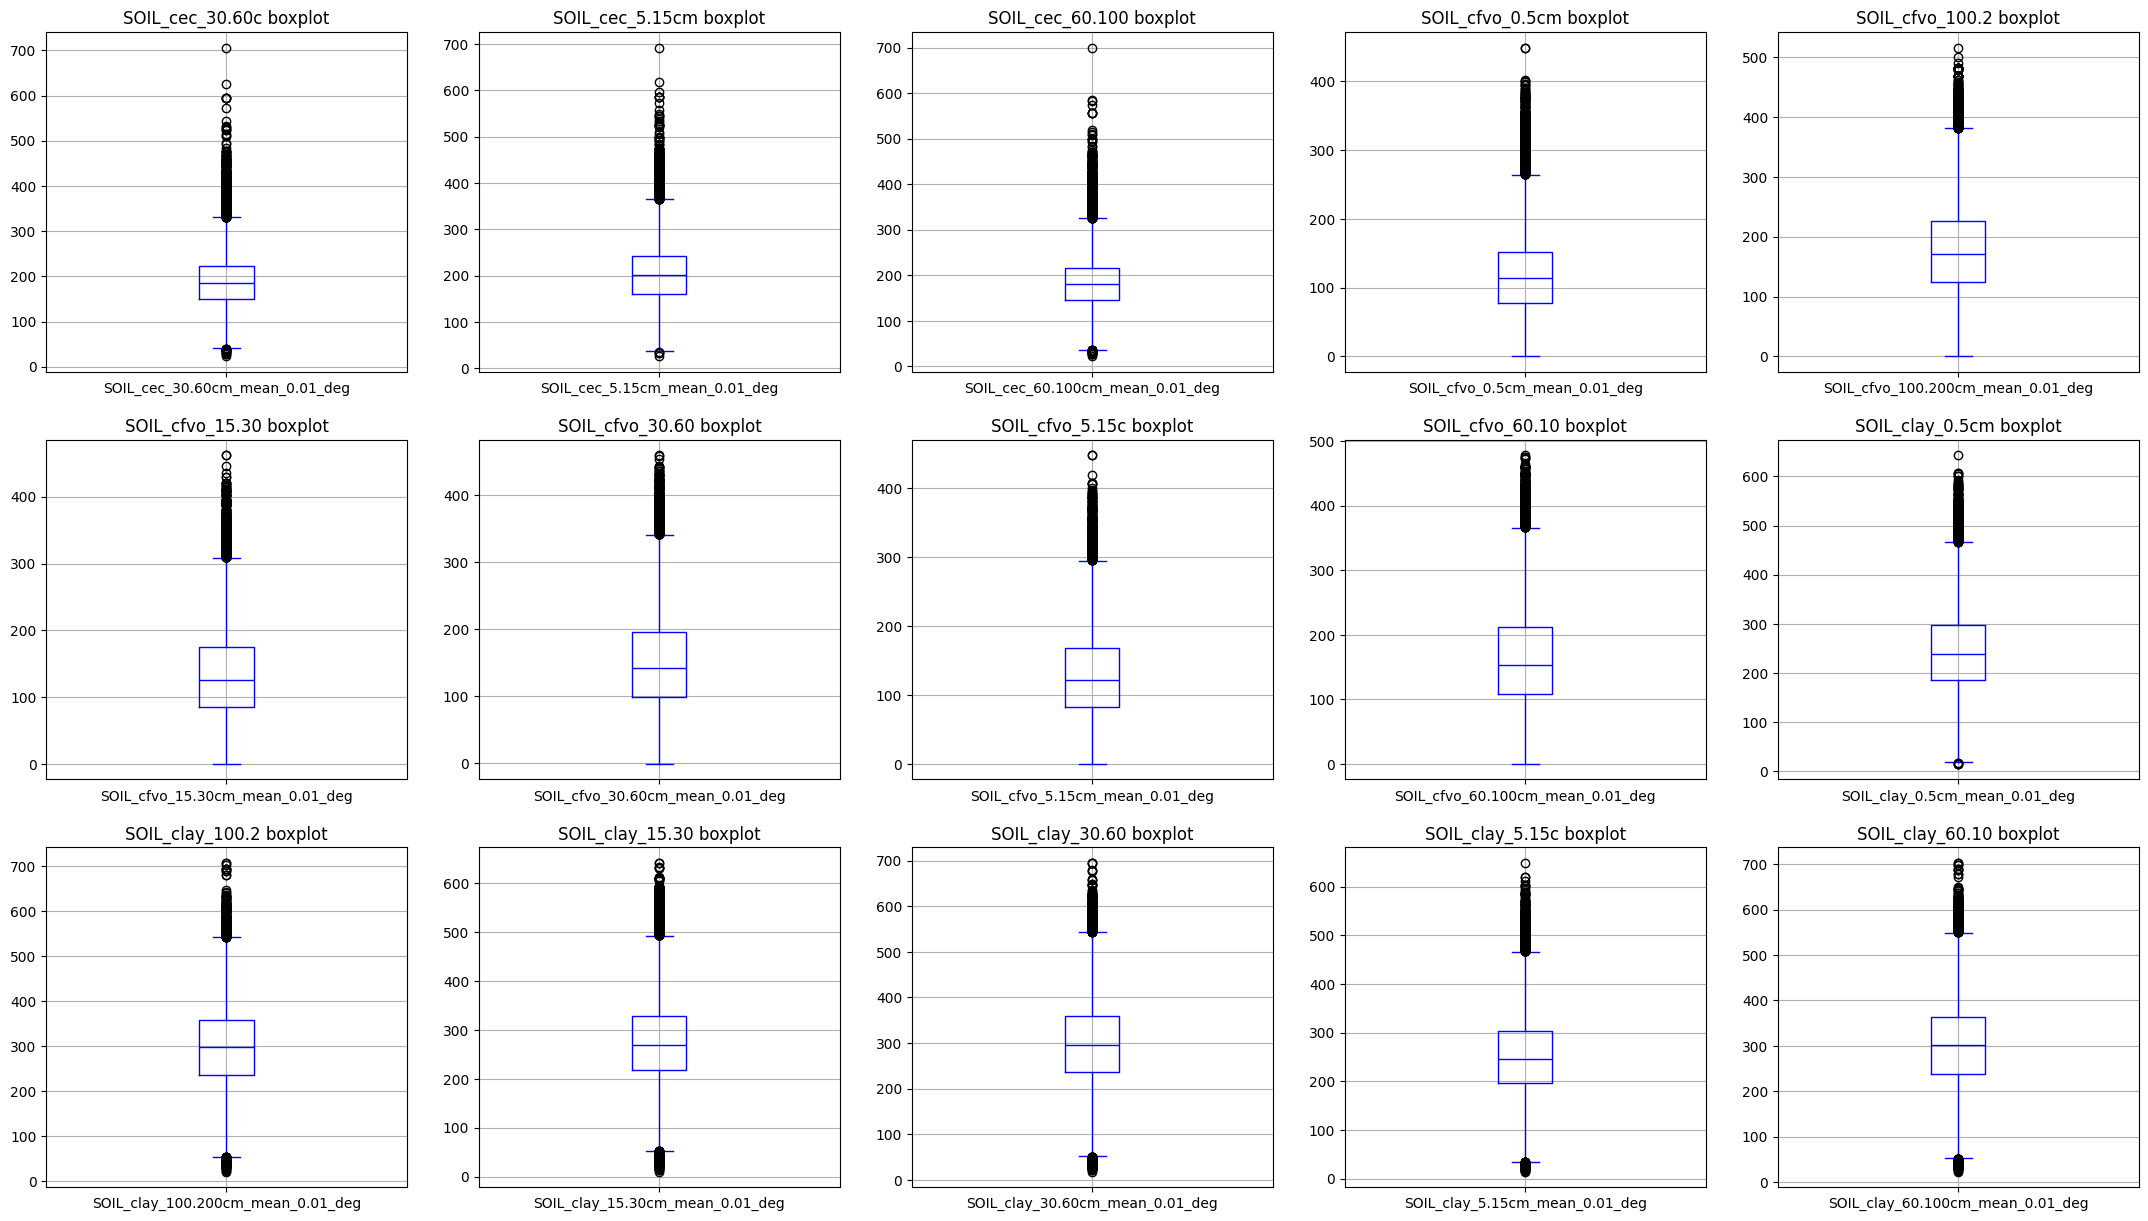

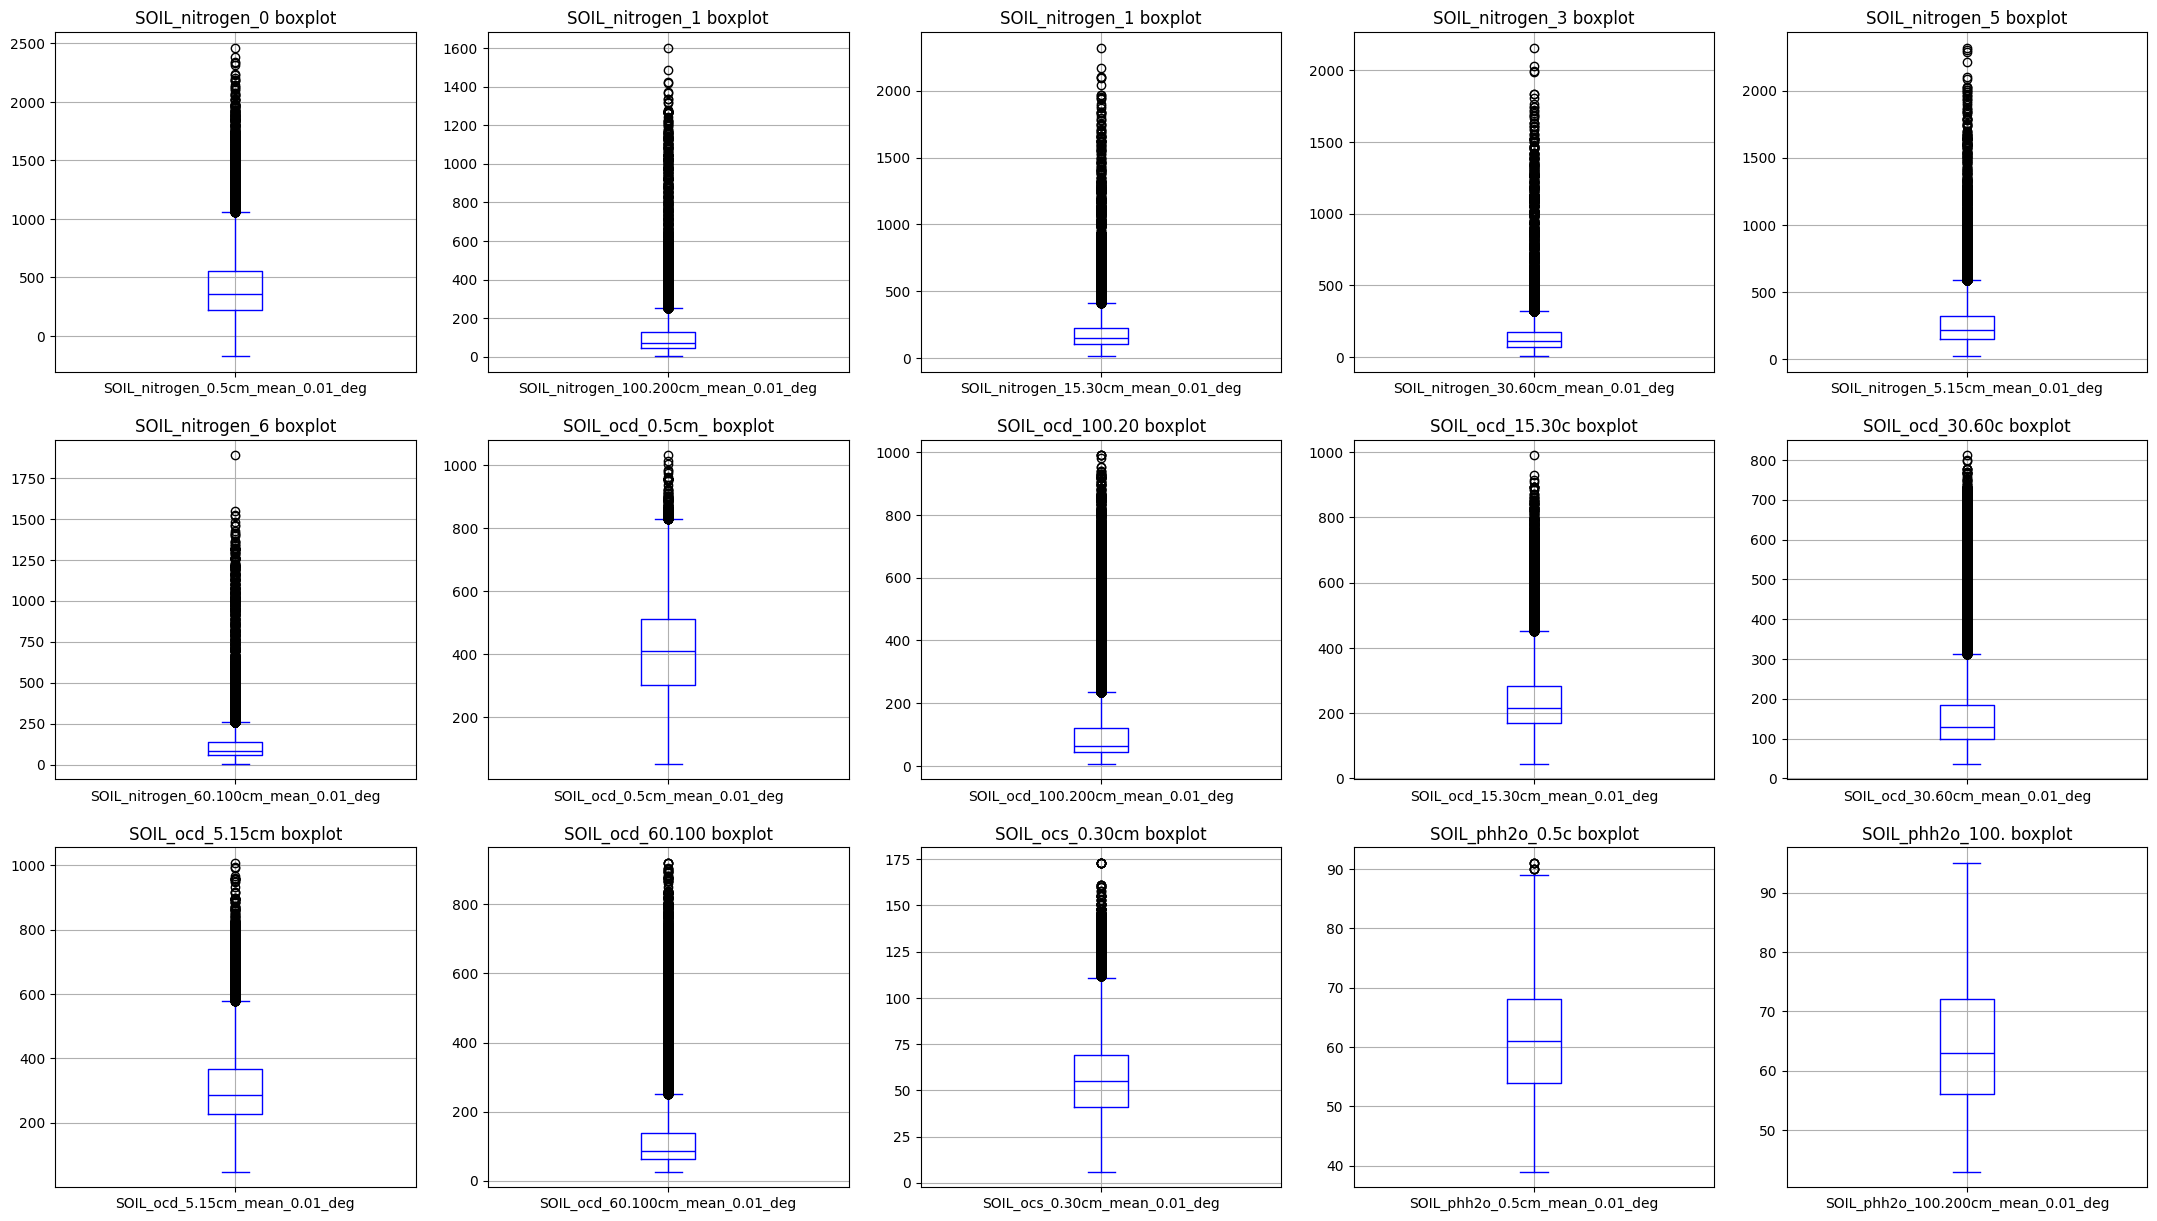

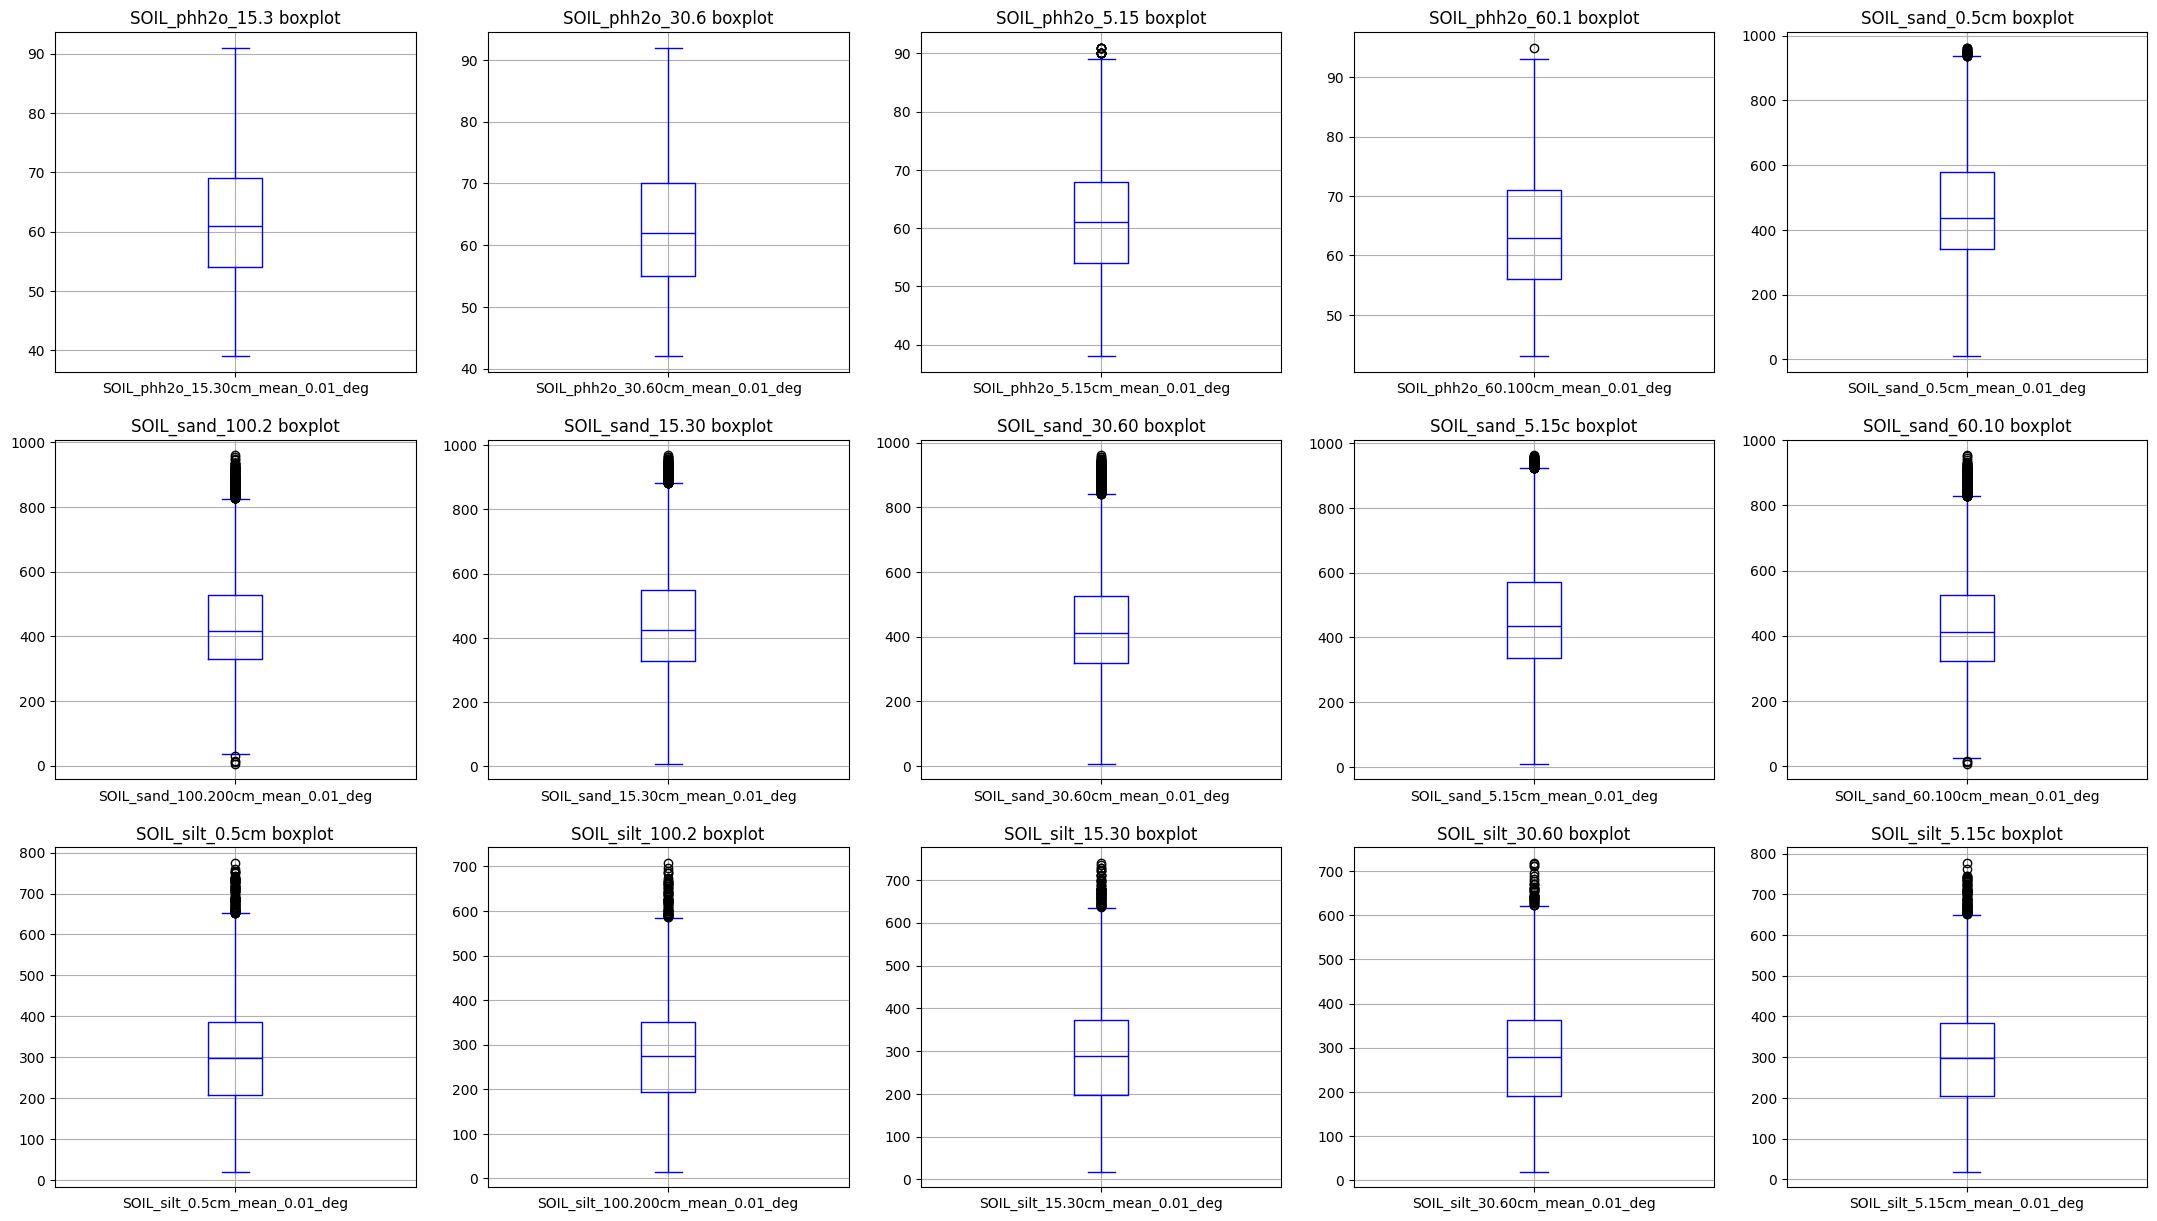

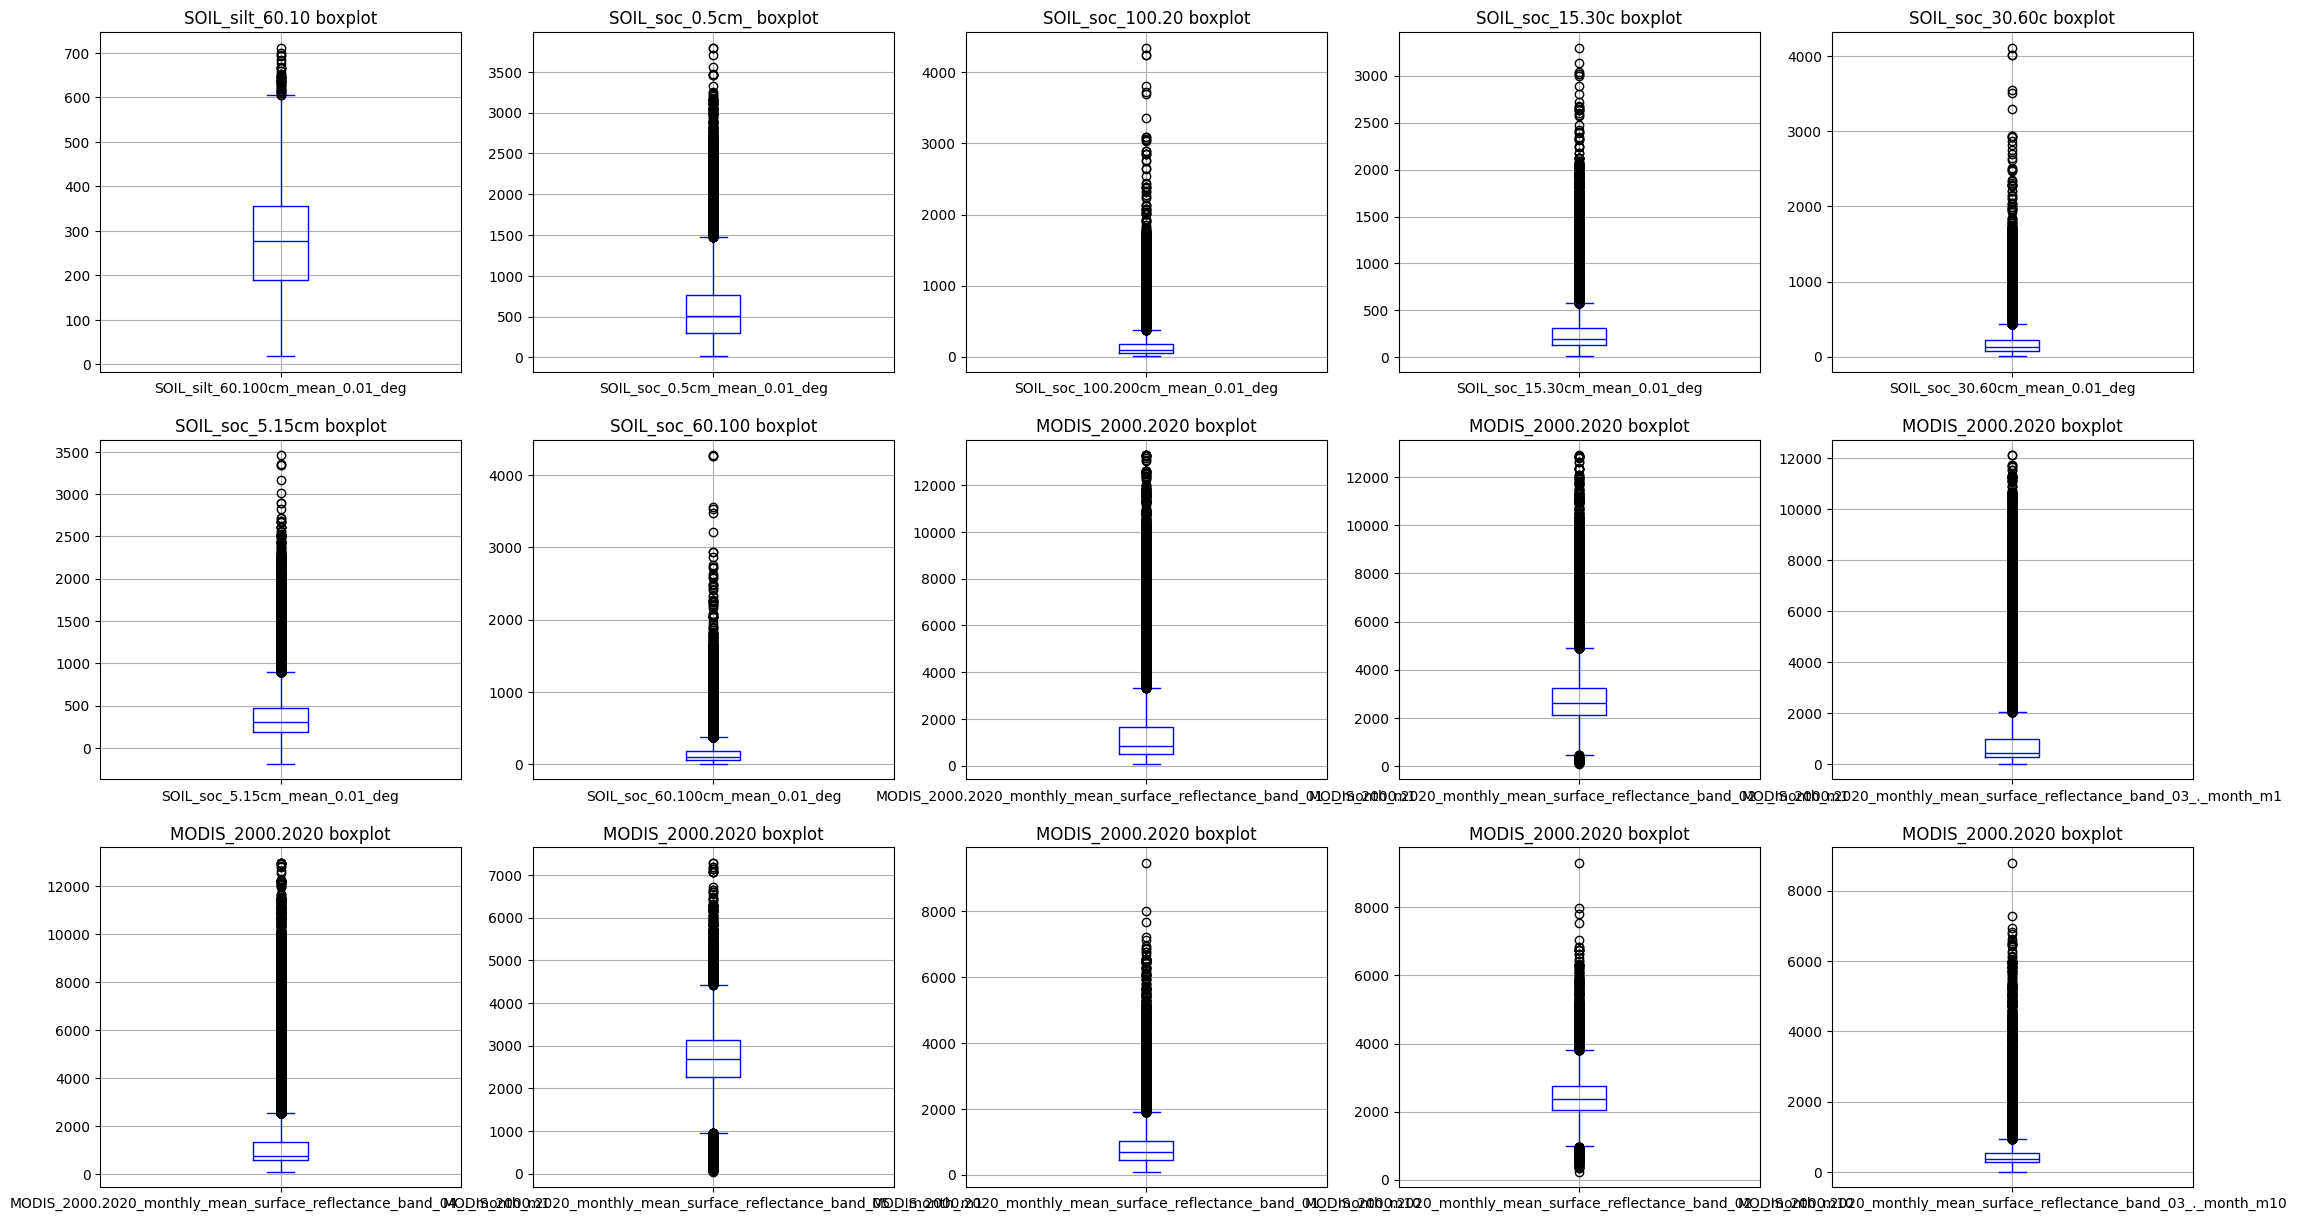

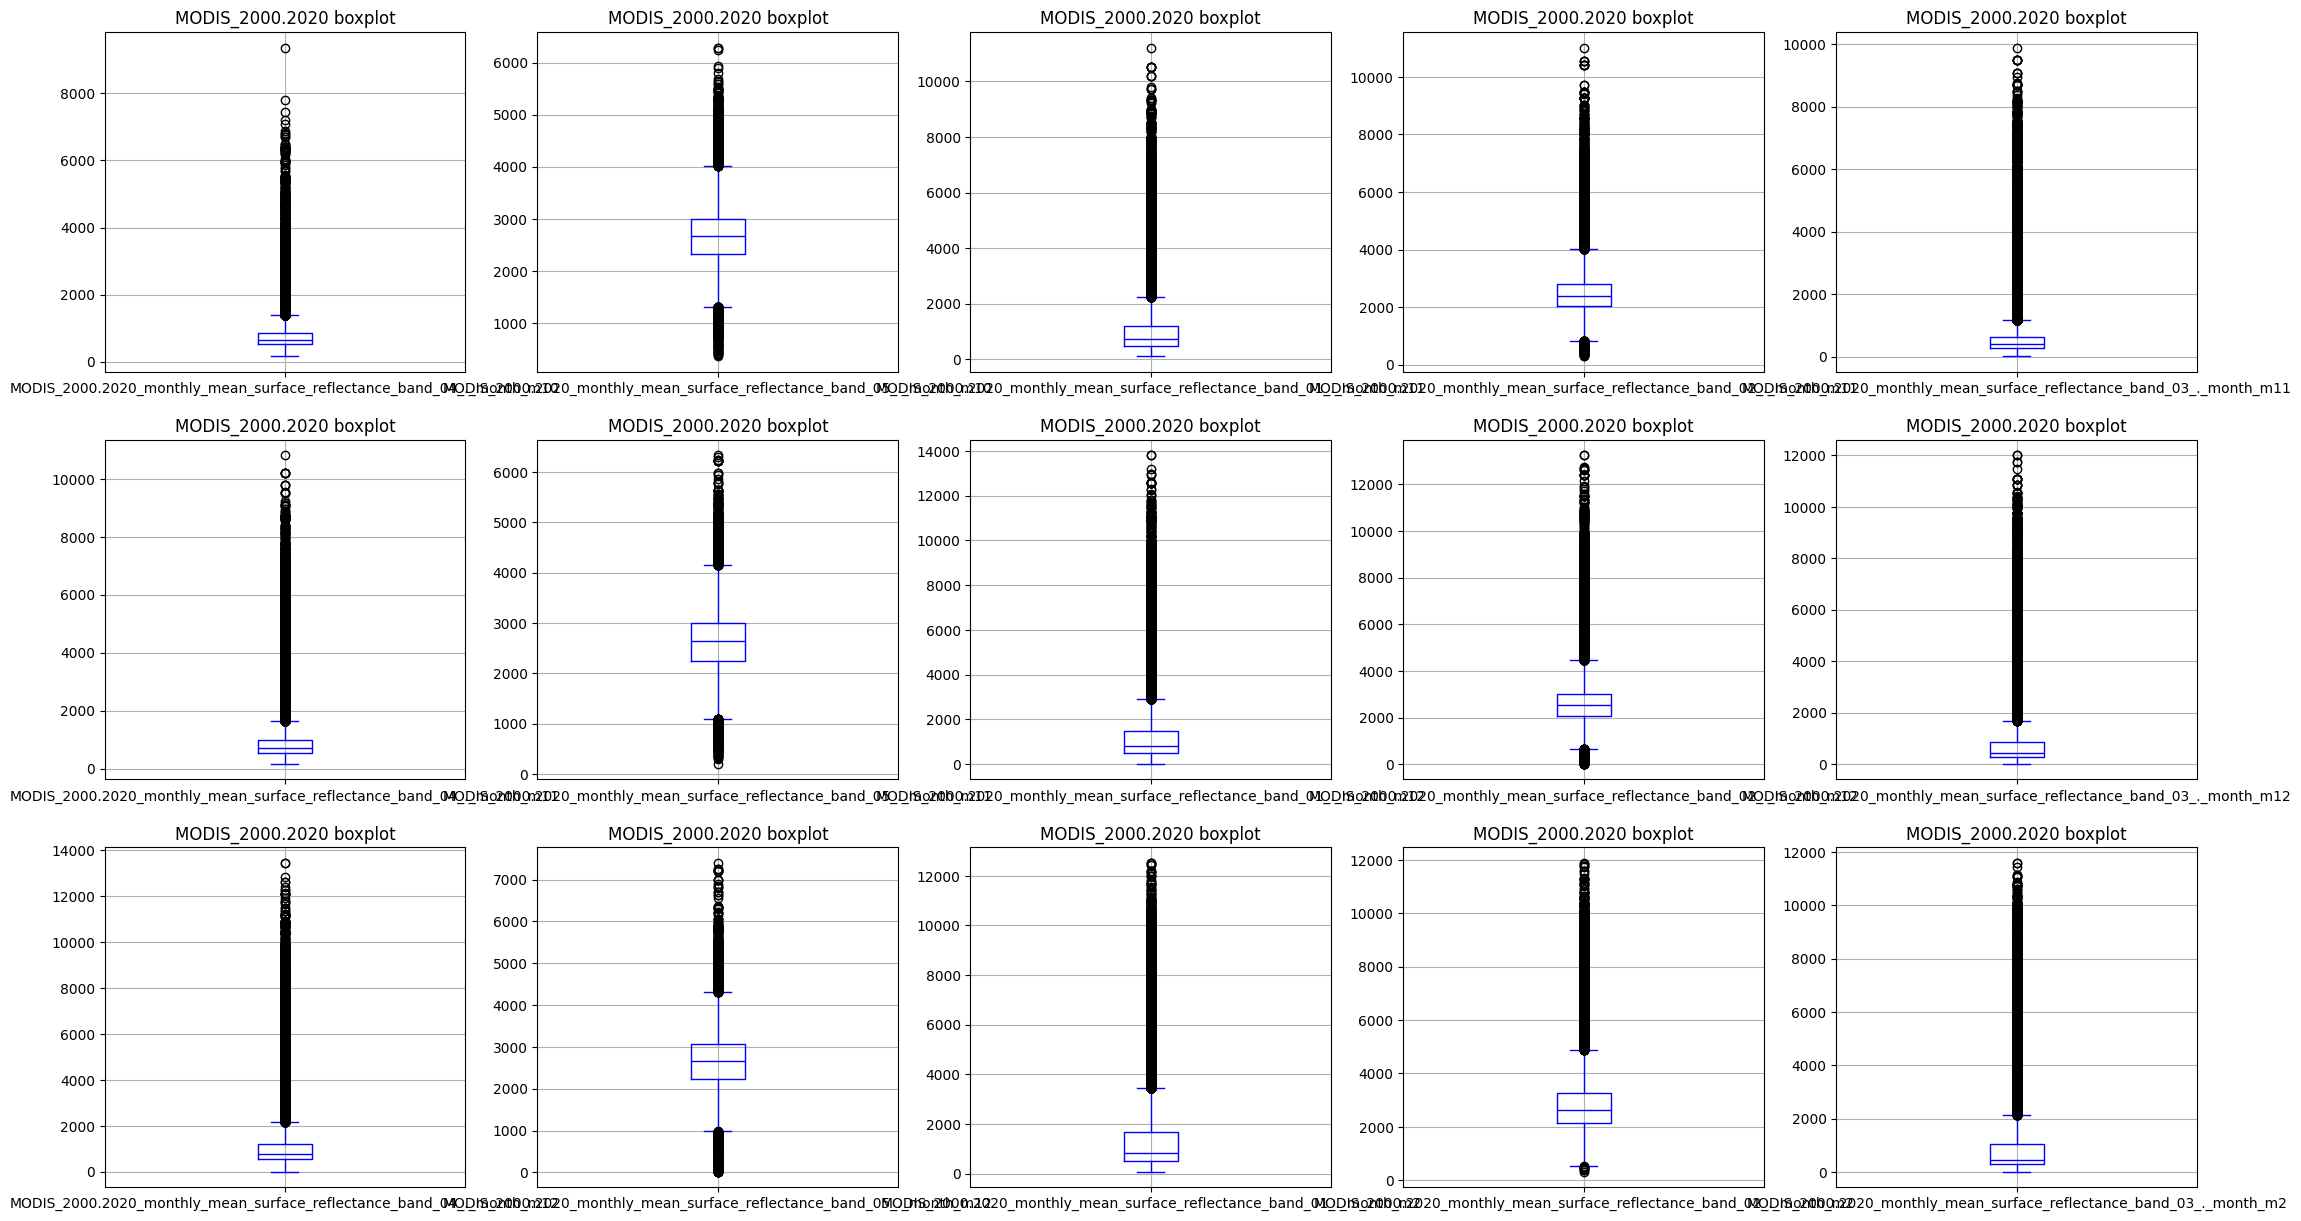

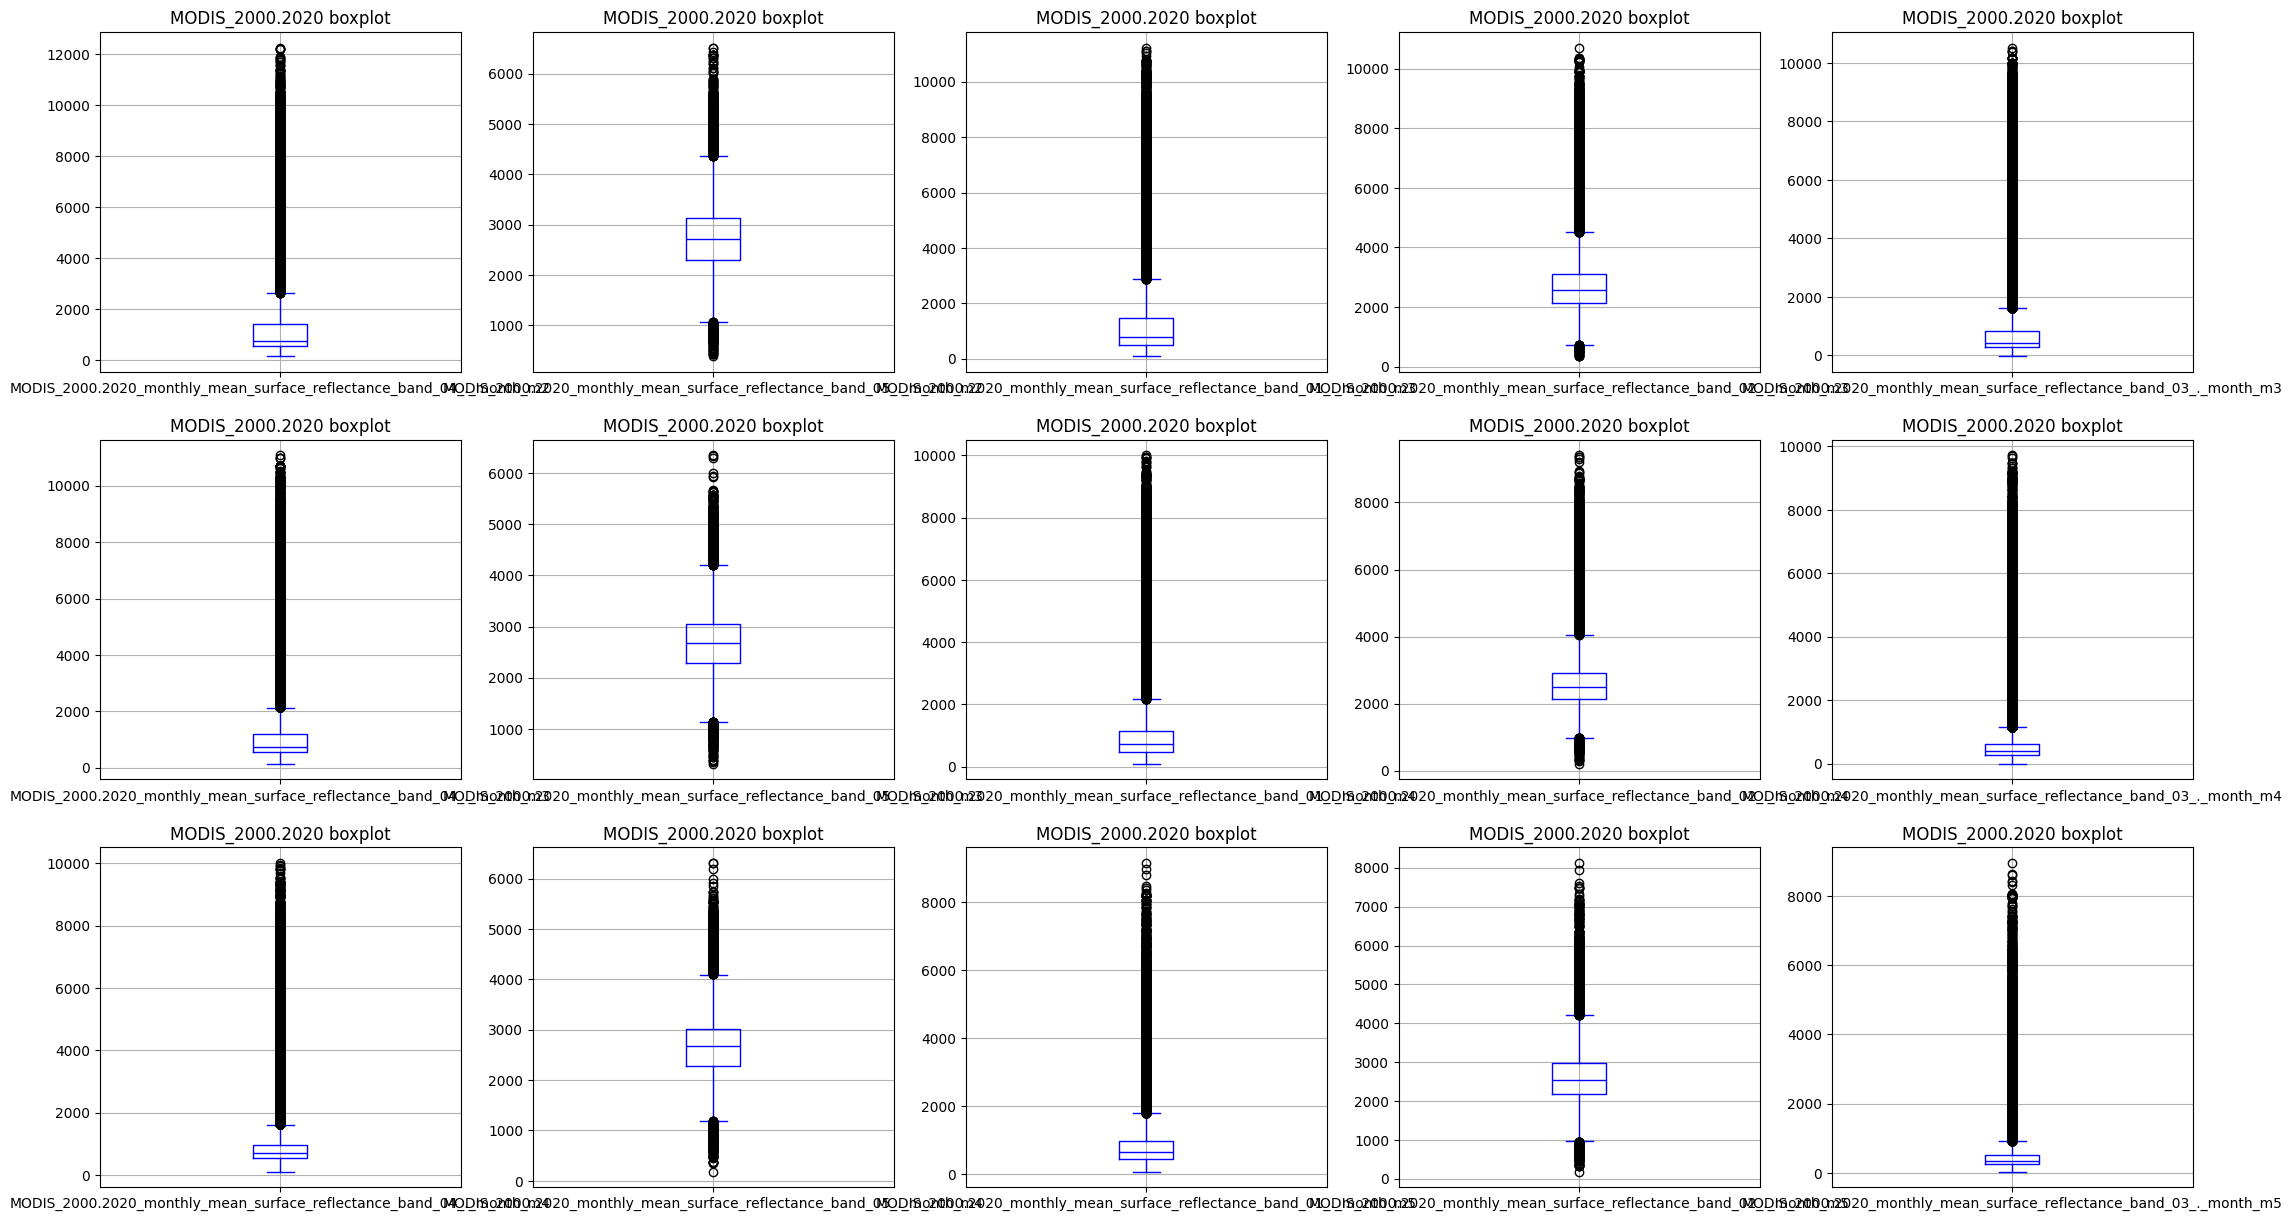

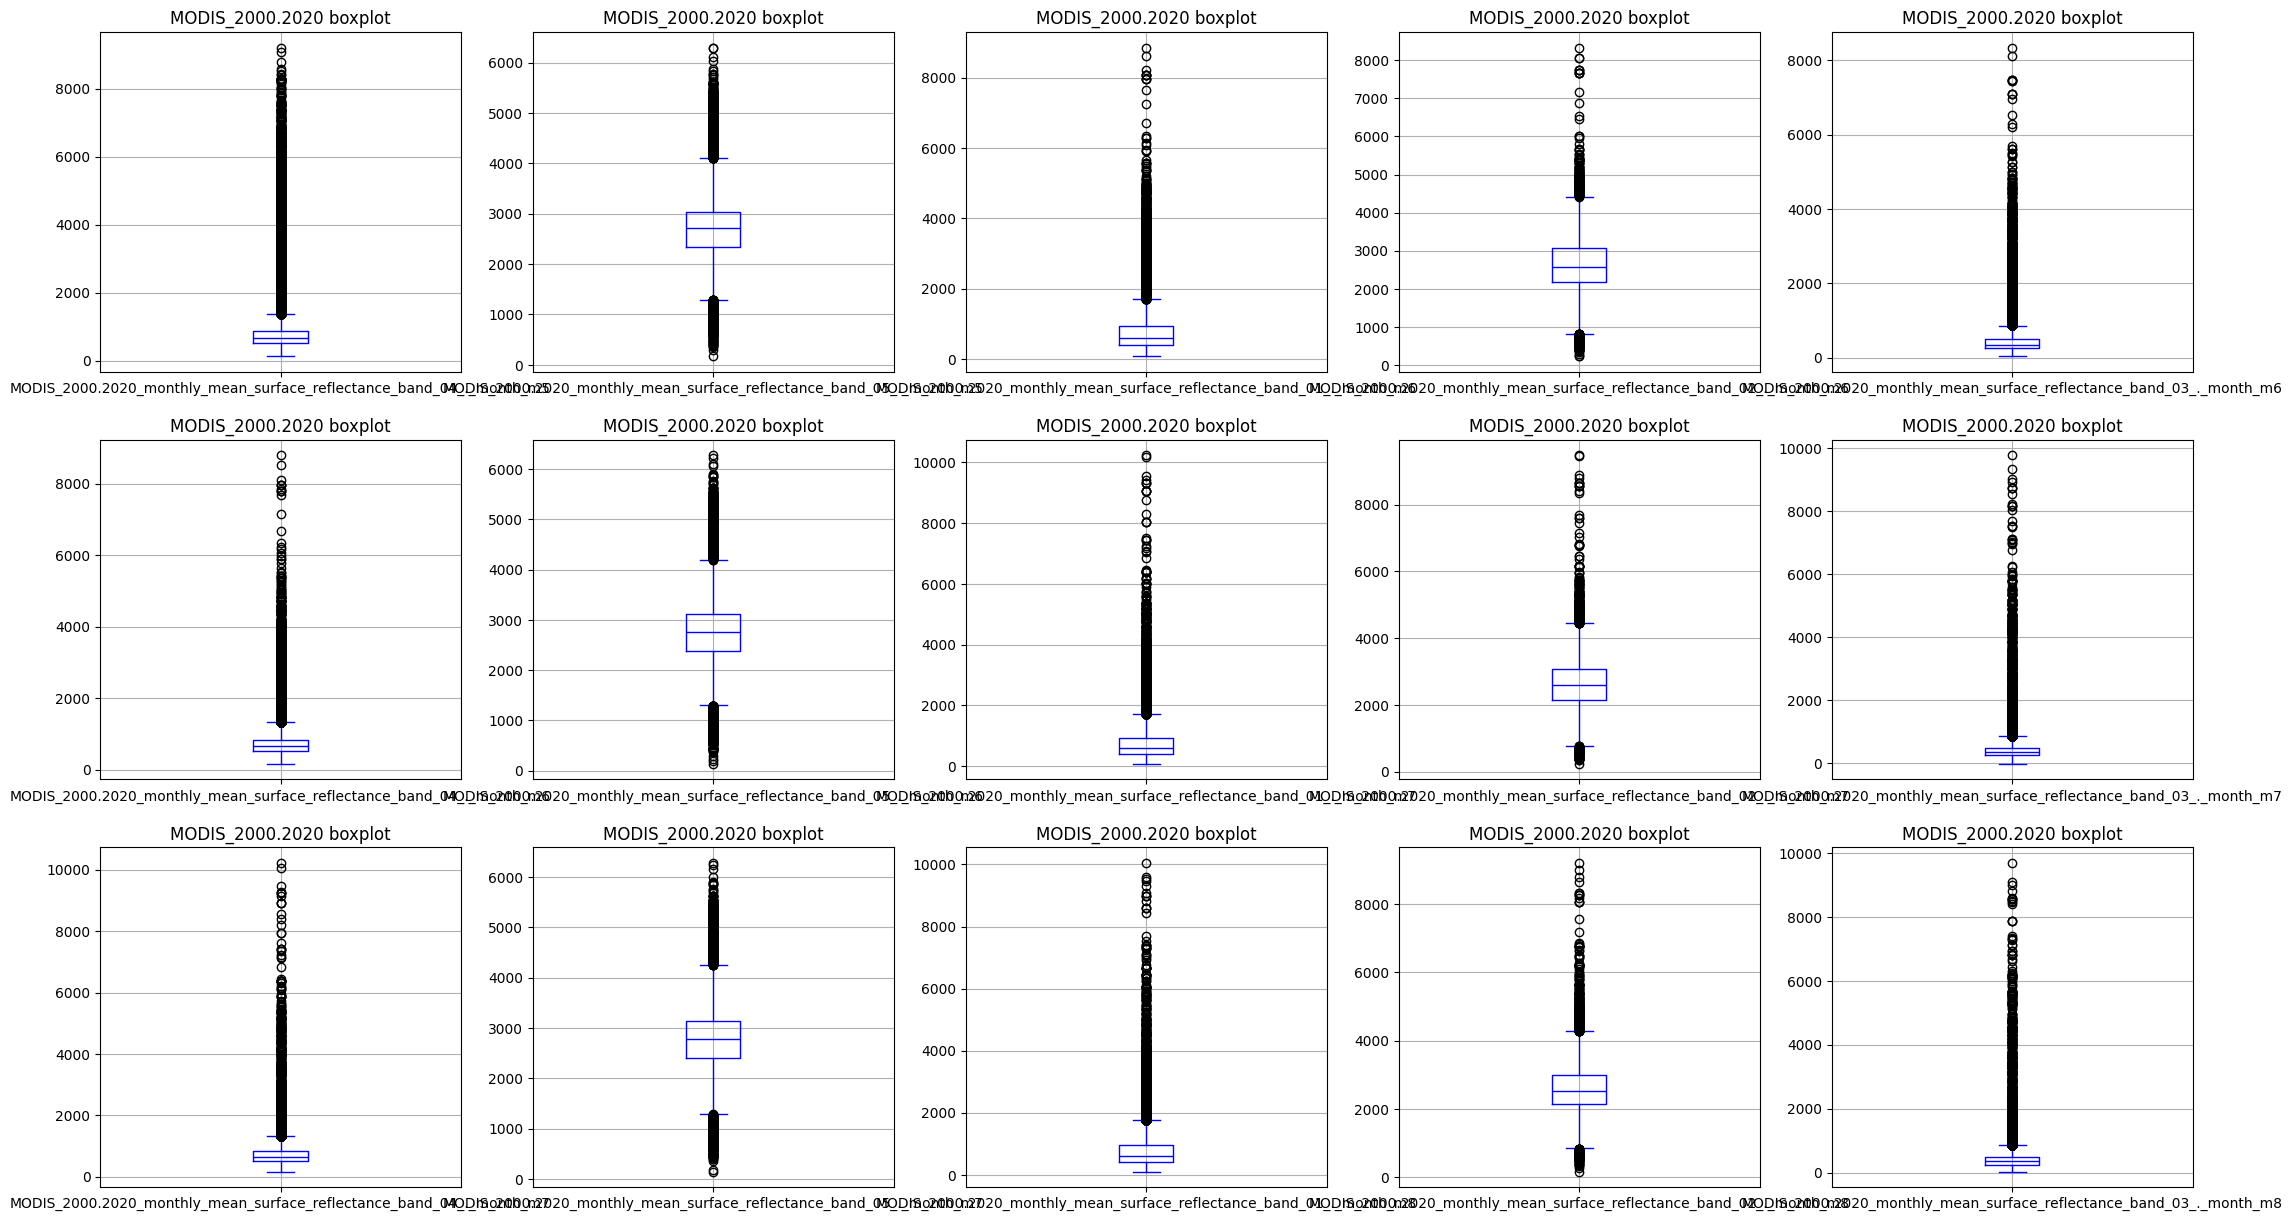

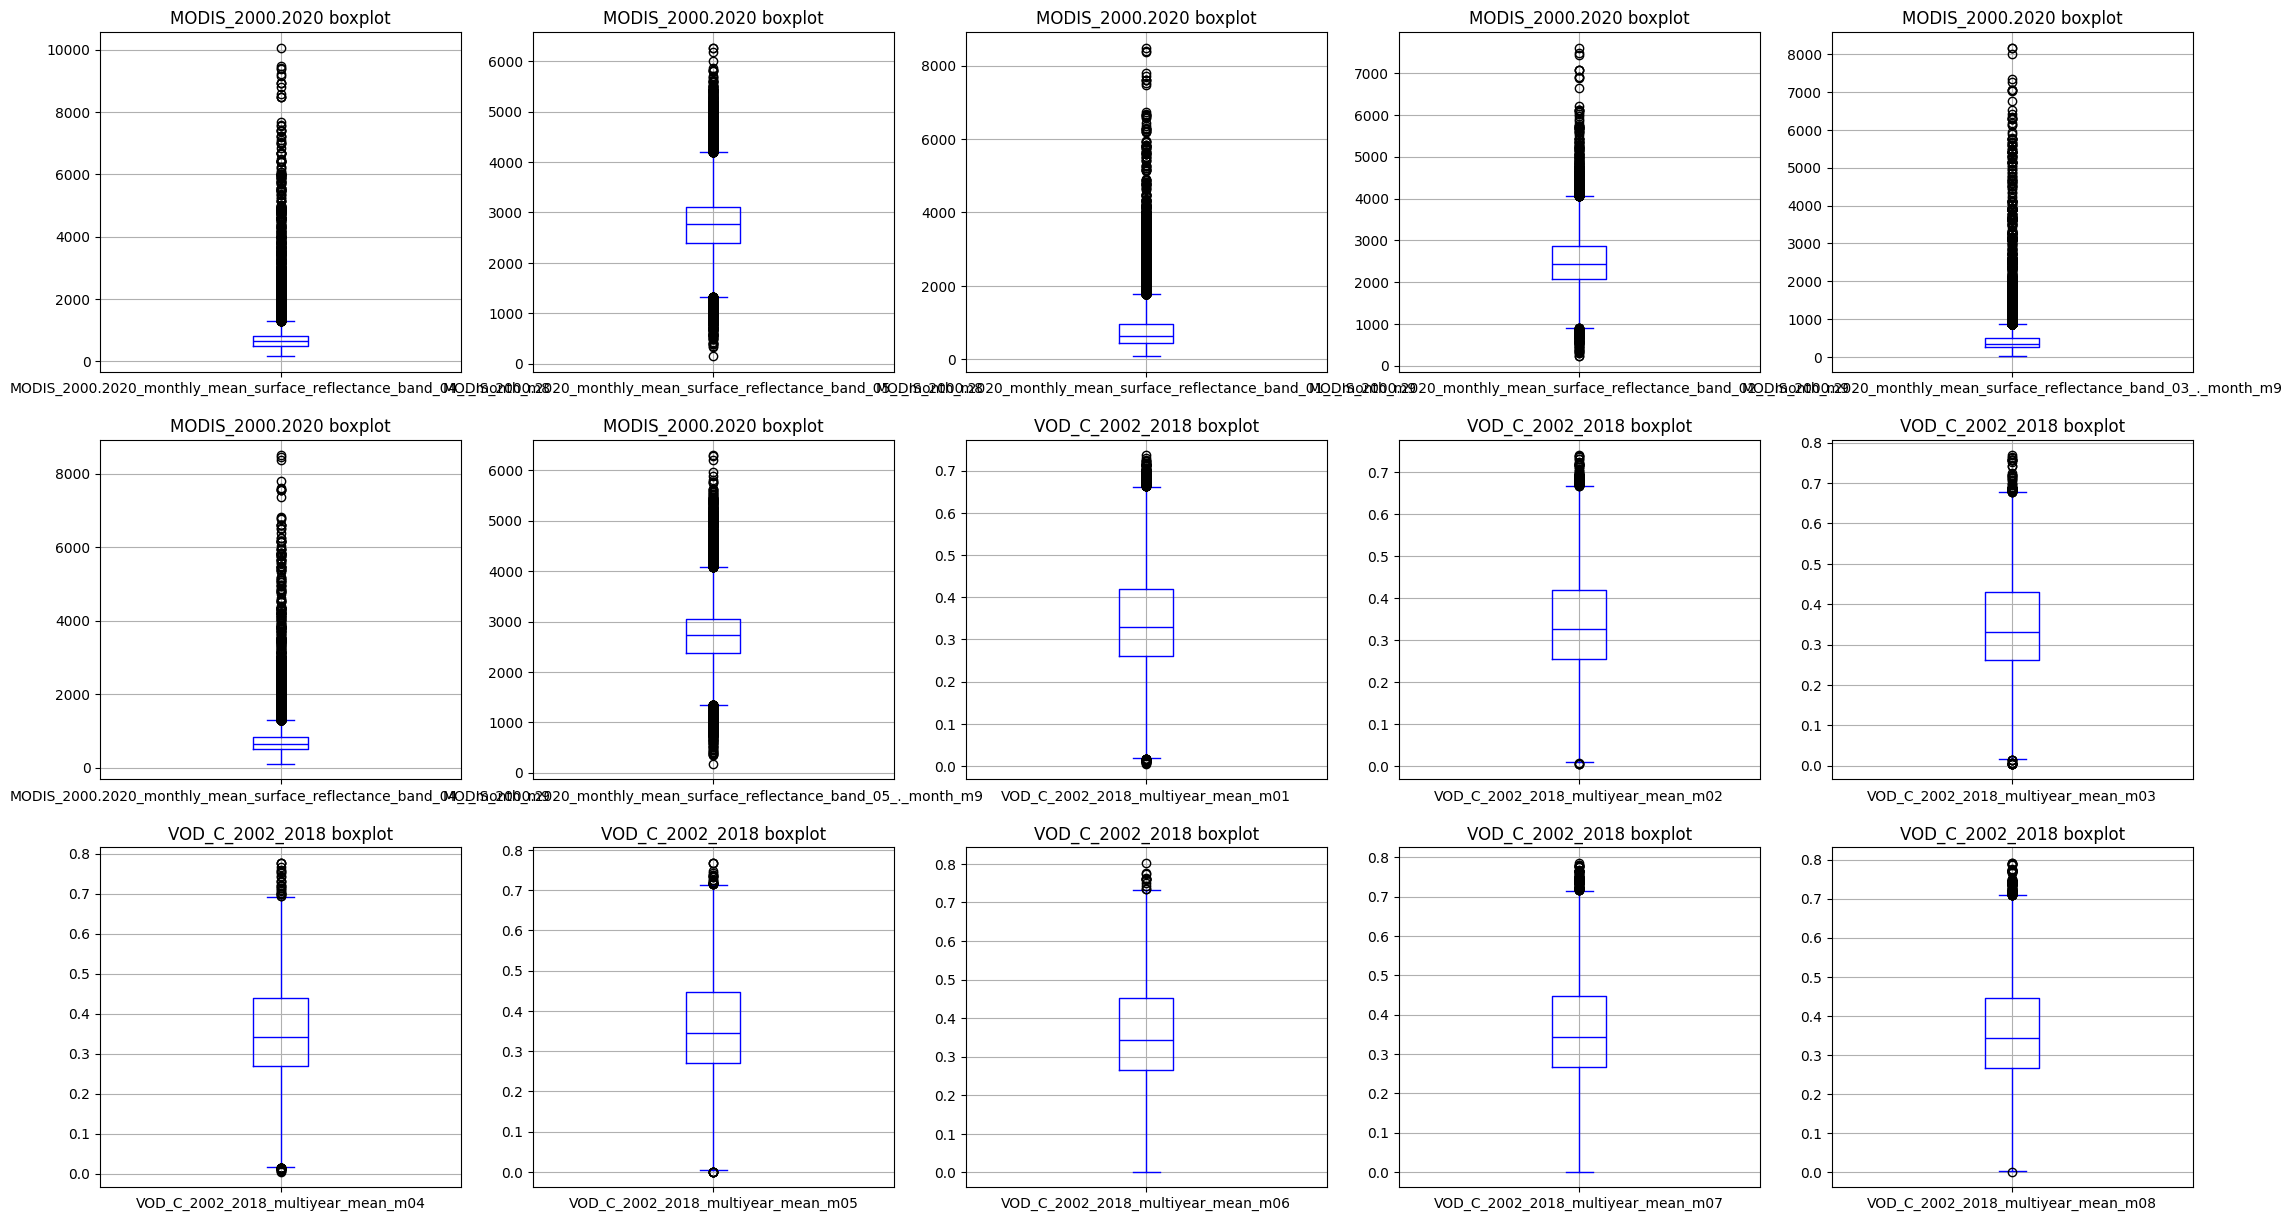

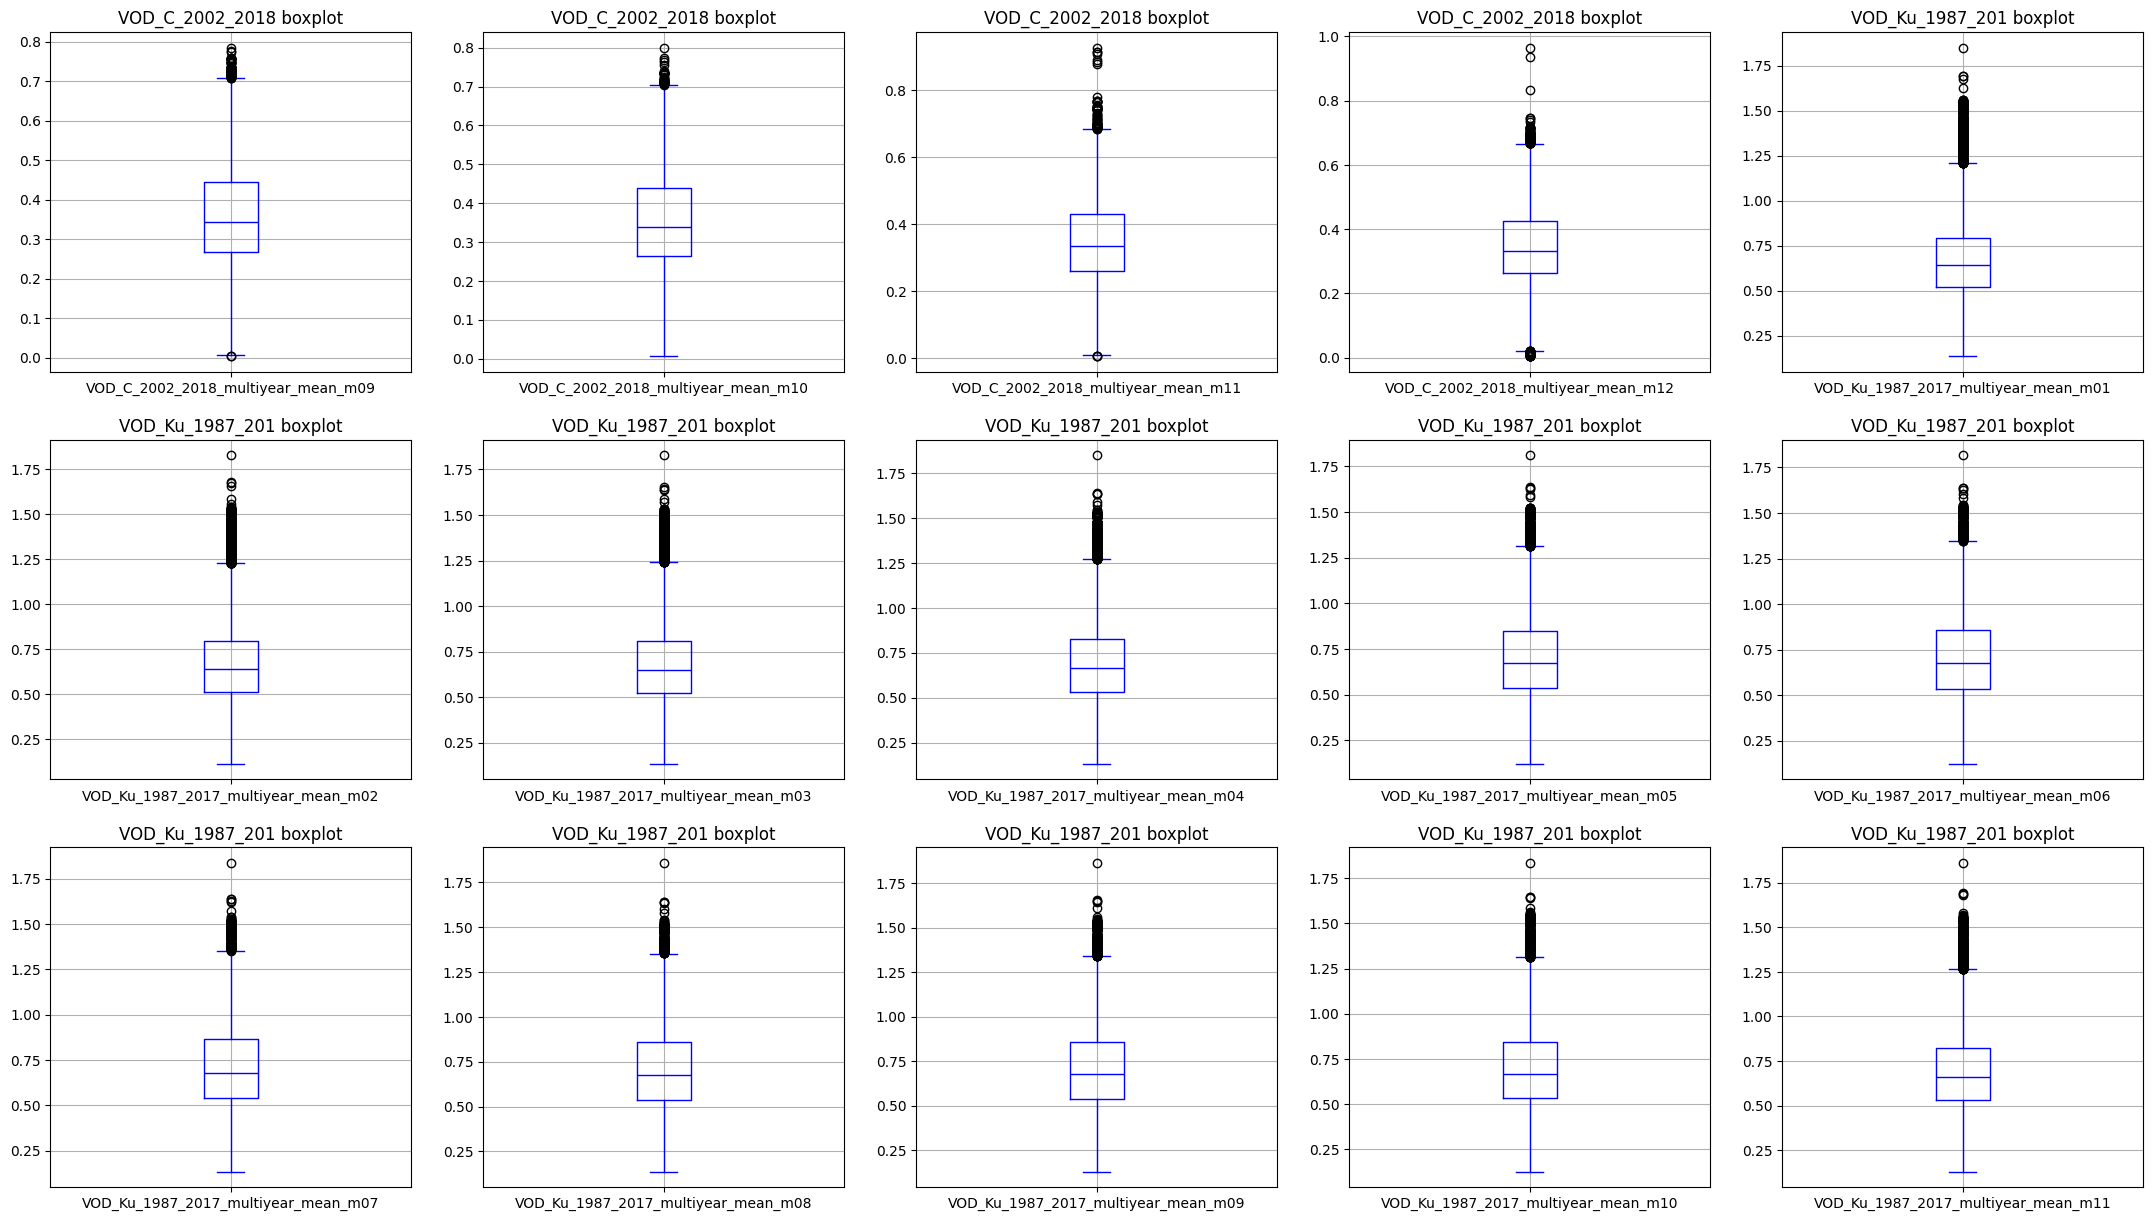

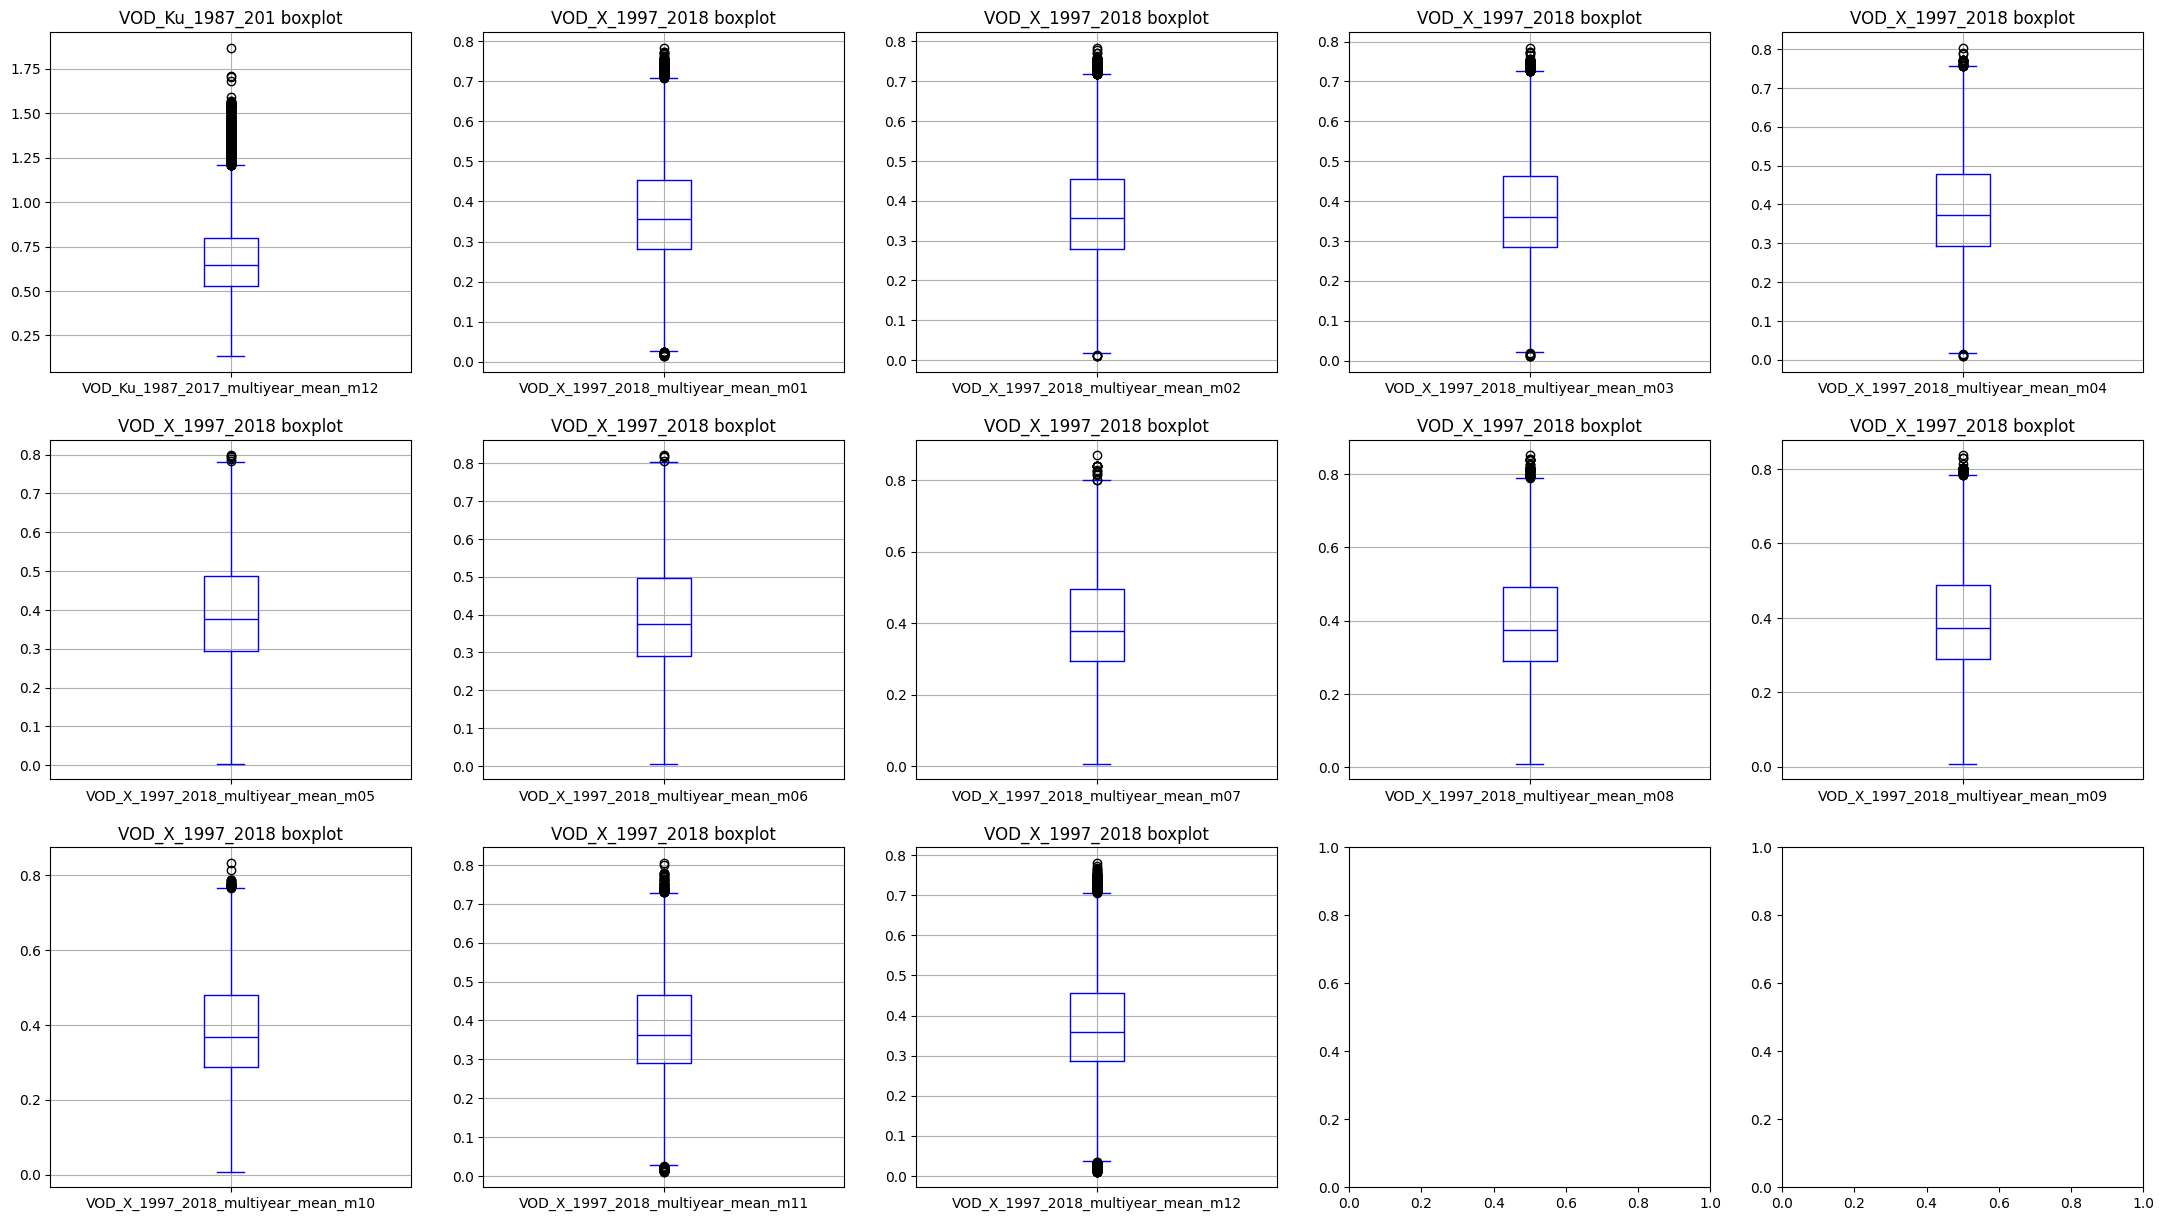

In [6]:
#Creamos la lista de indices con el cual controlaremos que columnas serán las que graficaremos
lista_indices = [(1,16),(16,31),(31,46),(46,61),(61,76),(76,91),(91,106),(106,121),(121,136),(136,151),(151,164)]

#Creamos el loop con el cual empezaremos a mostrar las gráficas
for i,x in lista_indices:
    #Aplicamos la función correspondiente para graficar
    dtef.show_boxplots(df_train,i,x,3,5)

Después de realizar las primeras gráficas de caja, podemos observar los siguientes comportamientos:

1. De manera general podemos observar que la gran mayoría de las gráficas presentan registros fuera de la caja, es decir, presentan _outliers_ para la respectiva columna que se está graficando

2. Existen algunas graficas (que parecen ser las menos) que aparentan no tener ningún _outlier_, es decir, ningún registro fuera de la caja

3. Existen algunas gráficas que presentan una representación de caja muy plana y un número alto de registros fuera de ella, lo que quiere indicar que para dicha columna se presentan demasiados outliers

Una vez obtenida la representación visual de los posibles outliers para cada columna, se procederá a realizar un pequeño cálculo del número de outliers por columna y determinar un aproximado del número total de outliers

In [7]:
#Obtenemos los enunciados más importantes sobre outliers
df_outliers_summ = dtef.summarize_outliers(df_train,1,164)

En total, 160 columnas (97.56%) presentan al menos 1 registro outlier (de acuerdo al criterio IQR)
En total, se tienen 345749 registros outliers (3.8%) dentro de todo el conjunto de datos


In [8]:
#Obtenemos el df con el número de outliers y % por columna
df_outliers_summ

,column_name,num_outliers,perc_outliers (%)
24,MODIS_2000.2020_monthly_mean_surface_reflectan...,9627,17.35
28,MODIS_2000.2020_monthly_mean_surface_reflectan...,9441,17.01
27,MODIS_2000.2020_monthly_mean_surface_reflectan...,8667,15.62
29,MODIS_2000.2020_monthly_mean_surface_reflectan...,8625,15.54
36,MODIS_2000.2020_monthly_mean_surface_reflectan...,8570,15.44
...,...,...,...
123,VOD_C_2002_2018_multiyear_mean_m06,13,0.02
147,VOD_X_1997_2018_multiyear_mean_m06,4,0.01
146,VOD_X_1997_2018_multiyear_mean_m05,5,0.01
97,SOIL_phh2o_0.5cm_mean_0.01_deg,8,0.01


Después de realizar los cálculos necesarios, se pudieron obtener los siguientes resultados imporntantes:

1. Vemos un alto porcentaje (97.56%) de columnas que presentan al menos un registro outlier, este resultado no es muy deseable ya que, de primera instancia, sabemos que al manejar casi cualquier columna dentro del conjunto de entrenamiento tendremos que manejar también con outliers, algo no muy deseable para el manejo de los datos.

2. En contraste con el número total de registros para todas las columnas, vemos un porcentaje bajo (3.8%) de outliers en todo el conjunto de entrenamiento, lo cual es buena noticia, ya que al menos sabemos que de manera global no contamos con muchos registros outliers y nuestra data, en conjunto, se comporta de manera "estable" sin muchas variaciones en sus registros.

3. En la tabla final del número de outliers por columna podemos ver que el porcentaje máximo de outliers por columna es tan solo del 17.35%, es decir, en la columna donde se presenta el mayor porcentaje de outliers dentro sus mismos registros es con un porcentaje total menor al 20%, un resultado bastante bueno por columna, ya que al menos sabemos que por columna los registros no se comportan con muchas variaciones y podríamos pensar que, a pesar de tener outliers, el manejo general de la data no presentará grandes desafíos.

En conclusión, dentro del conjunto de entrenamiento se presenta un porcentaje pequeño de outliers pero, sin embargo, tenemos que la gran mayoría de las columnas presentan al menos un outlier, lo cual hace pensar que no importe que columna tomemos (en su mayoría), siempre habremos que tratar con al menos un outlier. Por esto, es que se plantea la opción (o incluso necesidad) de **trabajar con un modelo que sea robusto a outliers, o, que al menos trabaje bien con ellos**.

## Pregunta 5 - Balance de la data

La pregunta en específico que se pretende responder en este punto es la siguiente: **_Valida si tu data está balanceada - ¿Hay diferentes grupos que representan todo el conjunto de datos, hay suficientes ejemplos de cada uno de estos grupos_**

Para poder responder esta pregunta lo más óptimo posible, nos remontaremos al diccionario de variables/columnas para el conjunto de entrenamiento de los dato, esto con el fin de poder saber exactamente que representa cada columna, es decir, qué tipo de información nos trata de explicar cada columna dentro del conjunto de entrenamiento. Una vez que tengamos una noción clara del significado de cada columna, analizaremos si éstos pueden ser agrupados mediante un criterio en general y, a partir de ahí, revisar si es que tenemos registros "consistentes" entre cada grupo.

De acuerdo a la página principal del proyecto en [Kaggle](https://www.kaggle.com/competitions/planttraits2024/data), dentro de la sección de Data, se señalan las columnas y el tipo de información que éstas despliegan. La información de estas columnas es la siguiente:

- id - ID único del registro qué también representa el sufijo del nombre de la imagen correspondiente
- WORLDCLIM_BIO[*] - Variables climáticas auxiliares para facilitar el manejo de las predicciones
- SOIL_[*]- Variables de suelo auxiliares para facilitar el manejo de las predicciones
- MODIS_[*] / VOD_[*]- Variables satelitales multitemporales auxiliares para facilitar el manejo de las predicciones
- X[*]_mean - Variables objetivo a predecir
- X[*]_sd - Desviación estándar de las características encontradas para cada especie

Una vez que ya se tiene una noción más clara del significado de las columnas, podemos decir que éstas se pueden agrupar en 3 conjuntos principales: **data climática, data del suelo y data satelital** (las demás columnas no muestran características de especies como tal). Con esto, podemos empezar a hacer los análisis correspondientes de acuerdo a estos 3 grupos y ver si es que de alguna manera éstos se encuentran balanceados y no resulta ser que se esté favoreciendo a un grupo más que al otro.

### 5.1 - Conteo de registros

En esta sección se realizará el conteo de registros (columnas) que se tiene para cada grupo dentro del conjunto de datos de entrenamiento, esto con el fin de saber si tenemos más registros para cierto grupo o si, de otro modo, el número de registros es el mismo para cada grupo

In [9]:
list_climate, list_soil, list_sat, list_other = dtef.get_records_groups_count(df_train)

En total, se tienen 6 (3.41%) columnas relacionadas a variables CLIMÁTICAS
En total, se tienen 61 (34.66%) columnas relacionadas a variables DEL SUELO
En total, se tienen 96 (54.55%) columnas relacionadas a variables SATELITALES
En total, se tienen 13 (7.39%) columnas relacionadas a variables OTRAS


De este primer resultado podemos observar que el número de elementos (columnas) para cada grupo no es para nada equitativo, ya que, por un lado tenemos solo 3.41% de columnas relacionadas a variables climáticas, mientras que por el otro lado tenemos un 54.55% de columnas relacionadas a variables satelitales, una diferencia de más del 50%, lo cual hace que sea una diferencia demasiado grande, además, de puntos anteriores sabemos que estas columnas no contienen valores nulos, por lo que hace que esta diferencia de registros resulte un poco más grande. 

Esto, de primera instancia, hace pensar que podríamos fallar en tratar de predecir variables climáticas dentro de nuestro modelo y, por otro lado, llegar a ser muy buenos para predecir variables satelitales, ya que tenemos una gran cantidad de ellas, pero ese sería un primer gran supuesto a comprobar dentro del entrenamiento del modelo. Por lo que, como primer resultado, tenemos lo siguiente:

<b><center>LOS GRUPOS SE NO SE ENCUENTRAN BALANCEADOS CON RESPECTO AL NÚMERO DE REGISTROS Y SERÍA INTERESANTE SABER SI AQUELLOS GRUPOS CON MENOS REGISTROS AL FINAL APORTAN MAYOR PESO AL MODELO</center></b>

### 5.2 - Características de los grupos

En esta sección lo que se pretende lograr es describir un poco las características que tiene cada grupo de columnas y así poder tener una mejor visión de como es que se comportan actualmente dentro del conjunto de entrenamiento y, con suerte, llegar a tener una noción un poco clara de como es que estas variables llegarán a favorecer o afectar al entrenamiento del modelo